<a href="https://colab.research.google.com/github/dipankarsahu1000/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**


Currently, we have a dataset from an ongoing cardiovascular study in residents of the town of Farmingham, Masschusets. The dataset contains the various information regarding the patients' health conditions and personal traits. It includes nearly 3000 records and 17 attributes. Each attribute is a potential risk factor. There are both demographic, behavourial and medical risk factors. Using various classification models, we would try to predict the patient has a risk of suffering from coronary heart disease in the upcoming ten years based on the present conditions of the patient.


# **GitHub Link -**

https://github.com/dipankarsahu1000/Cardiovascular-Risk-Prediction



# **Problem Statement**


* The classification goal is to predict whether the patient has a 10-year risk of future coronary disease (CHD).

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing some important libraries for initiation. More libraries will be added later as required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Almabetter: Full Stack Data Science/Projects/Classification/Cardiovascular Risk Prediction/Datasets/data_cardiovascular_risk.csv'
df = pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 3390 rows and 17 columns.


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
dup_count = len(df[df.duplicated()])
print(f"There are {dup_count} duplicate value(s) in the dataset.")

There are 0 duplicate value(s) in the dataset.


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
null_count = df.isna().sum().sum()
print(f"There are {null_count} missing/null values in the dataset.")

There are 510 missing/null values in the dataset.


In [10]:
# Checking the Missing Values/Null Values in each of the column
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

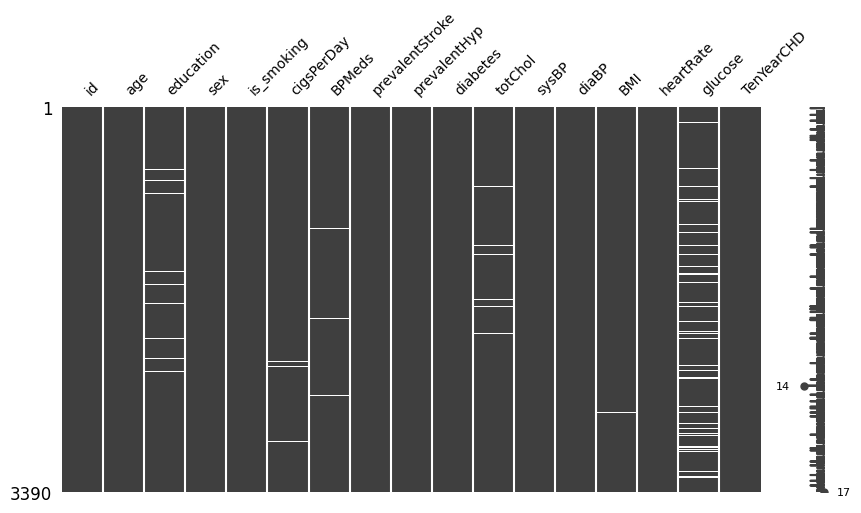

In [11]:
# Visualizing the missing values
msno.matrix(df, figsize = (10, 5), fontsize = 10)

### What did you know about your dataset?

* The issue of duplicate values is not there for our dataset.
* The are a few null/missing values present in our dataset.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for var in df.columns:
  print(f"The unique values for the '{var}' are:\n\n {df[var].unique()}.\n\n The total number of unique values in '{var}' column: {df[var].nunique()}.\n\n\n")

The unique values for the 'id' are:

 [   0    1    2 ... 3387 3388 3389].

 The total number of unique values in 'id' column: 3390.



The unique values for the 'age' are:

 [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32].

 The total number of unique values in 'age' column: 39.



The unique values for the 'education' are:

 [ 2.  4.  1.  3. nan].

 The total number of unique values in 'education' column: 4.



The unique values for the 'sex' are:

 ['F' 'M'].

 The total number of unique values in 'sex' column: 2.



The unique values for the 'is_smoking' are:

 ['YES' 'NO'].

 The total number of unique values in 'is_smoking' column: 2.



The unique values for the 'cigsPerDay' are:

 [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.].

 The total number of unique values in 'cigsPerDay' column: 32.



The unique values for the '

### Variables Description

 1. **age**: The age of the patient (in discrete numerical values).

 2. **education**: Maybe the education level of the patient (in nominal categorical numbers).
         
 3. **sex**: Whether the patient is male ('M') or female ('F').

 4. **is_smoking**: Whether the patient is smoking currently or not ('YES' or 'NO').

 5. **cigsPerDay**: Number of cigarettes smoked by the patient on an average in a day (discrete numerical values).

 6. **BPMeds**: Whether the patient is taking any medications for blood pressure (nominal categorical numbers: 0 signifying 'No' and 1 signifying 'Yes').

 7. **prevalentStroke**: Whether the patient has a history of stroke (nominal categorical numbers: 0 signifying 'No' and 1 signifying 'Yes').

 8. **prevalentHyp**: Whether the patient has a history of hypertension (nominal categorical numbers: 0 signifying 'No' and 1 signifying 'Yes').

 9. **diabetes**: Whether the patient has diabetes or not (nominal categorical numbers: 0 signifying 'No' and 1 signifying 'Yes').

 10. **totChol**: Measure of the total cholestrol (continuous numerical values).

 11. **sysBP**: Measure of the systolic blood pressure (continuous numerical values).

 12. **diaBP**: Measure of the diastolic blood pressure (continuous numerical values).

 13. **BMI**: The body mass index of the patient (continuous numerical values).

 14. **heartRate**: The heart rate of the the patient (discrete numerical values)

 15. **glucose**: The glucose level of the patient (continuous numerical values).

 16.  **TenYearCHD**: Whether the patient has a 10-year risk of future coronary heart disease (nominal categorical numbers: 0 signifying 'No' and 1 signifying 'Yes').

## 3. ***Data Wrangling***

In [15]:
# Creating a copy of the original dataset before proceeding further
original_df = df.copy()

###**i. Modifying the column names**

In [16]:
# For convenience, converting the column names to all lower case
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsperday', 'bpmeds',
       'prevalentstroke', 'prevalenthyp', 'diabetes', 'totchol', 'sysbp',
       'diabp', 'bmi', 'heartrate', 'glucose', 'tenyearchd'],
      dtype='object')

In [17]:
# Logging the numerical variables and the categorical variables separately
cat_columns = ['education', 'sex', 'is_smoking', 'bpmeds', 'prevalentstroke', 'prevalenthyp', 'diabetes', 'tenyearchd']
num_columns  = ['age', 'cigsperday', 'totchol', 'sysbp', 'diabp', 'bmi', 'heartrate', 'glucose']

###**ii. Taking care of the null values**

In [18]:
# Checking only those columns which have null/missing values
df.isnull().sum()[df.isnull().sum() > 0]

education      87
cigsperday     22
bpmeds         44
totchol        38
bmi            14
heartrate       1
glucose       304
dtype: int64

* Only two categorical columns `'education'` and `'bpmeds'` contain null/missing values.

In [19]:
# Counting the values in the 'education' column before further treatment
df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [20]:
# Imputing the null values in the 'education' column with its mode
df['education'] = df['education'].fillna(df['education'].mode()[0])

# Counting the values in the 'education' column after the imputation
df['education'].value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [21]:
# Counting the values in the 'BPMeds' column before further treatment
df['bpmeds'].value_counts()

0.0    3246
1.0     100
Name: bpmeds, dtype: int64

In [22]:
# Imputing the null values in the 'BPMeds' column with its mode
df['bpmeds'] = df['bpmeds'].fillna(df['bpmeds'].mode()[0])

# Counting the values in the 'BPMeds' column after the imputation
df['bpmeds'].value_counts()

0.0    3290
1.0     100
Name: bpmeds, dtype: int64

* The numerical columns `'cigsperday'`, `'totchol'`, `'bmi'`, `'heartrate'` and `'glucose'` contain null/missing values.

In [23]:
# Creating a list of all the numerical columns that has null/missing values
num_column_with_nulls = [ 'cigsperday', 'totchol', 'bmi', 'heartrate', 'glucose']

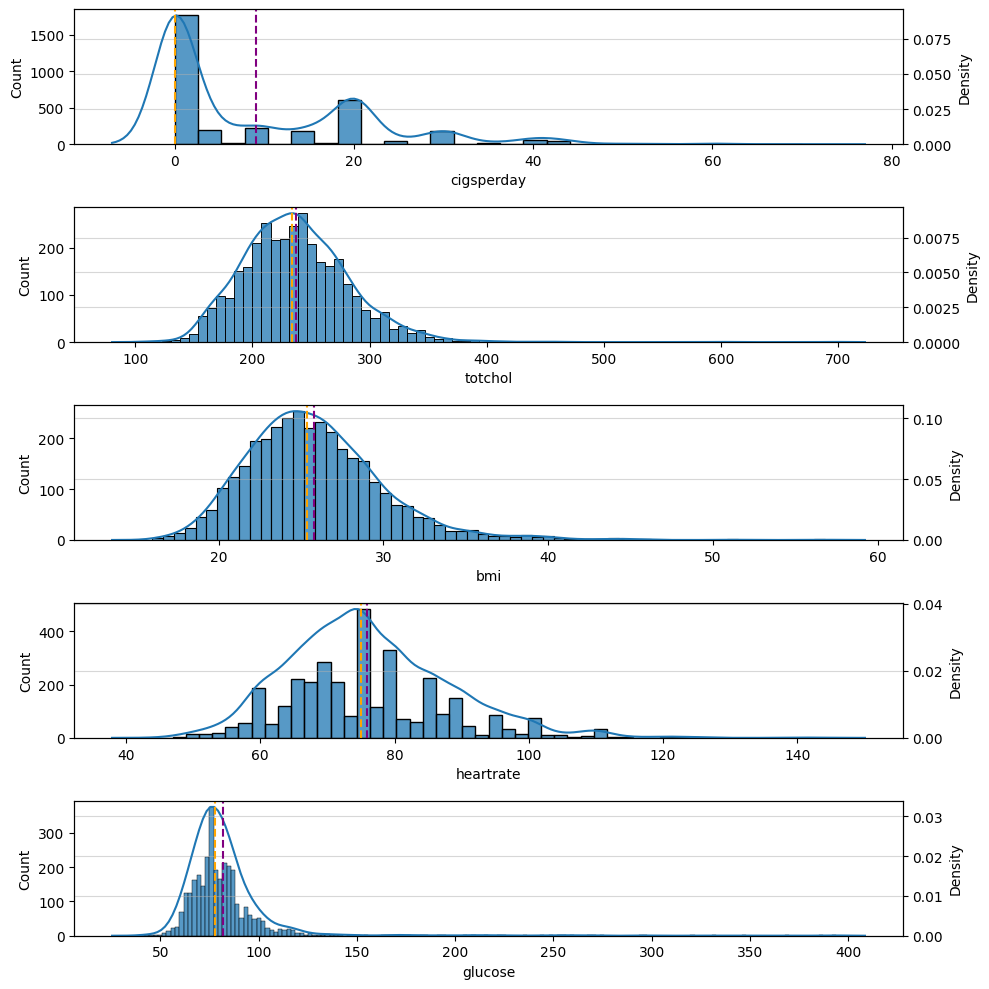

In [24]:
# Checking the overall distribution of each of these columns

plt.figure(figsize = (10, 10))

for i in range(len(num_column_with_nulls)):

  plt.subplot(5, 1, i + 1)
  ax1 = plt.gca()
  sns.histplot(df[num_column_with_nulls[i]], ax = ax1)
  ax2 = ax1.twinx()
  sns.kdeplot(df[num_column_with_nulls[i]], ax = ax2)   # Overlapping the KDE plot on the histogram.

  plt.grid(which = 'major', alpha = 0.5)
  plt.grid(which = 'minor', alpha = 0.5)
  plt.axvline(df[num_column_with_nulls[i]].mean(), color = 'purple', linestyle = 'dashed', linewidth = 1.5)   # The purple dashed line signifies the mean.
  plt.axvline(df[num_column_with_nulls[i]].median(), color = 'orange', linestyle = 'dashed', linewidth=1.5)   # The orange dashed line signifies the median.

plt.tight_layout()

* Positive skewness can be observed in all of the numerical columns with outliers.

<Axes: >

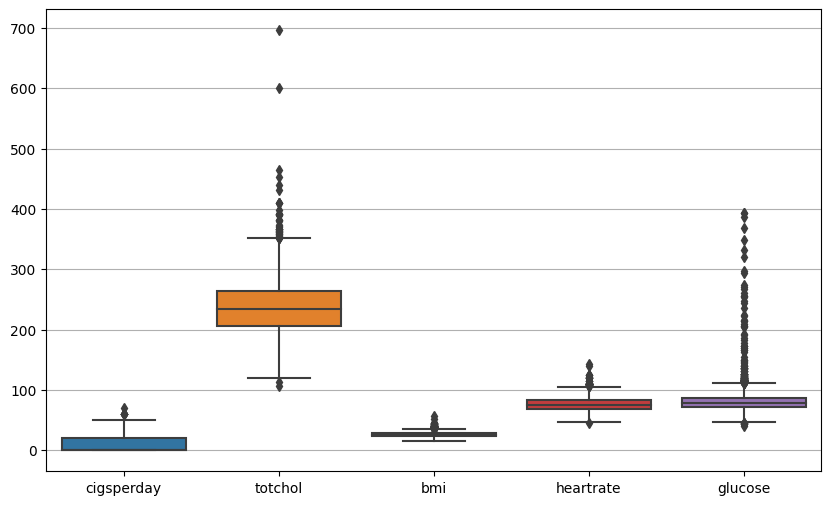

In [25]:
# Checking the outliers in these columns
plt.figure(figsize = (10, 6))
plt.grid()
sns.boxplot(df[num_column_with_nulls])

* As these columns are skewed and have outliers, and also the number of null/missing values is quite large for these columns. Let's try to impute the null values using KNN-Imputer.

In [26]:
# Imputing the null values in numerical columns using KNN-Imputer
from sklearn.impute import KNNImputer
imputer =  KNNImputer(n_neighbors = 10)
df[num_column_with_nulls] = imputer.fit_transform(df[num_column_with_nulls])

In [27]:
# Checking for the null in the entire dataset once again
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsperday         0
bpmeds             0
prevalentstroke    0
prevalenthyp       0
diabetes           0
totchol            0
sysbp              0
diabp              0
bmi                0
heartrate          0
glucose            0
tenyearchd         0
dtype: int64

* So, all the missing/null values have been taken care of.

###**iii. Sanity Checks**

* If `'is_smoking'` column has 'NO' value, then `'cigsperday'` should be 0. Checking if this holds in the dataset.

In [28]:
# Checking if there are any non-zero 'cigsperday' values for the rows where the value for 'is_smoking' is 'NO'
df[(df['cigsperday'] != 0.0) & (df['is_smoking'] == 'NO')]

,id,age,education,sex,is_smoking,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd


In [29]:
# Checking if there are any zero 'cigsperday' values for the rows where the value for 'is_smoking' is 'YES'
df[(df['cigsperday'] == 0.0) & (df['is_smoking'] == 'YES')]

,id,age,education,sex,is_smoking,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd


* So, we have a few datapoints where `'is_smoking'` has 'YES' value, but `'cigsperday'` is zero. Although, it may seem erronous at first. But it is possible that the person is a smoker, but doesn't smoke everyday. So, it is alright to leave these columns as they are.

###**iv. Separating the Independent Variables and the Dependent Variable**

In [30]:
# Selecting the independent vairables and saving them as a list
independent_variables = df.columns[1:-1].tolist()
independent_variables

['age',
 'education',
 'sex',
 'is_smoking',
 'cigsperday',
 'bpmeds',
 'prevalentstroke',
 'prevalenthyp',
 'diabetes',
 'totchol',
 'sysbp',
 'diabp',
 'bmi',
 'heartrate',
 'glucose']

In [31]:
# Selecting the dependent vairables and saving them as a list
dependent_variable = [df.columns[-1]]
dependent_variable

['tenyearchd']

### What all manipulations have you done and insights you found?

* All the column names were converted to lowercase for convenience.
* The null/missing values were dealth with. For the categorical columns, the null values were imputed with their modes. For the numerical columns, the null values were imputed with their medians.
* The independent variables and the dependent variable were separated out.
* These was no need to consider duplicate rows, as there were none.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Count Plot - Distribution of the Dependent Variable

<Axes: xlabel='tenyearchd', ylabel='count'>

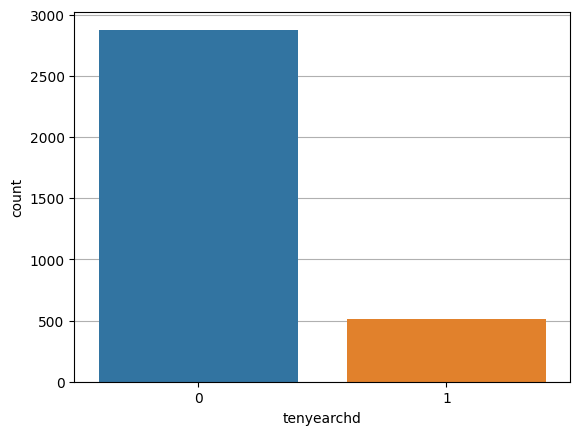

In [32]:
ax = plt.gca()
ax.yaxis.grid()
ax.set_axisbelow(True)
sns.countplot(data = df, x = dependent_variable[0])

##### 1. Why did you pick the specific chart?

* To check how the values for the dependent variable are distributed.

##### 2. What is/are the insight(s) found from the chart?

* Most of the patients studied didn't have any 10-year risk of future coronary heart disease.
* Also the dependent variable is unbalanced.

#### Chart - 2: Count Plot - Distribution of the Categorical Independent Variables

In [33]:
# Dropping the dependent variable 'tenyearchd' from the list containing the categorical column names
cat_columns.remove('tenyearchd')

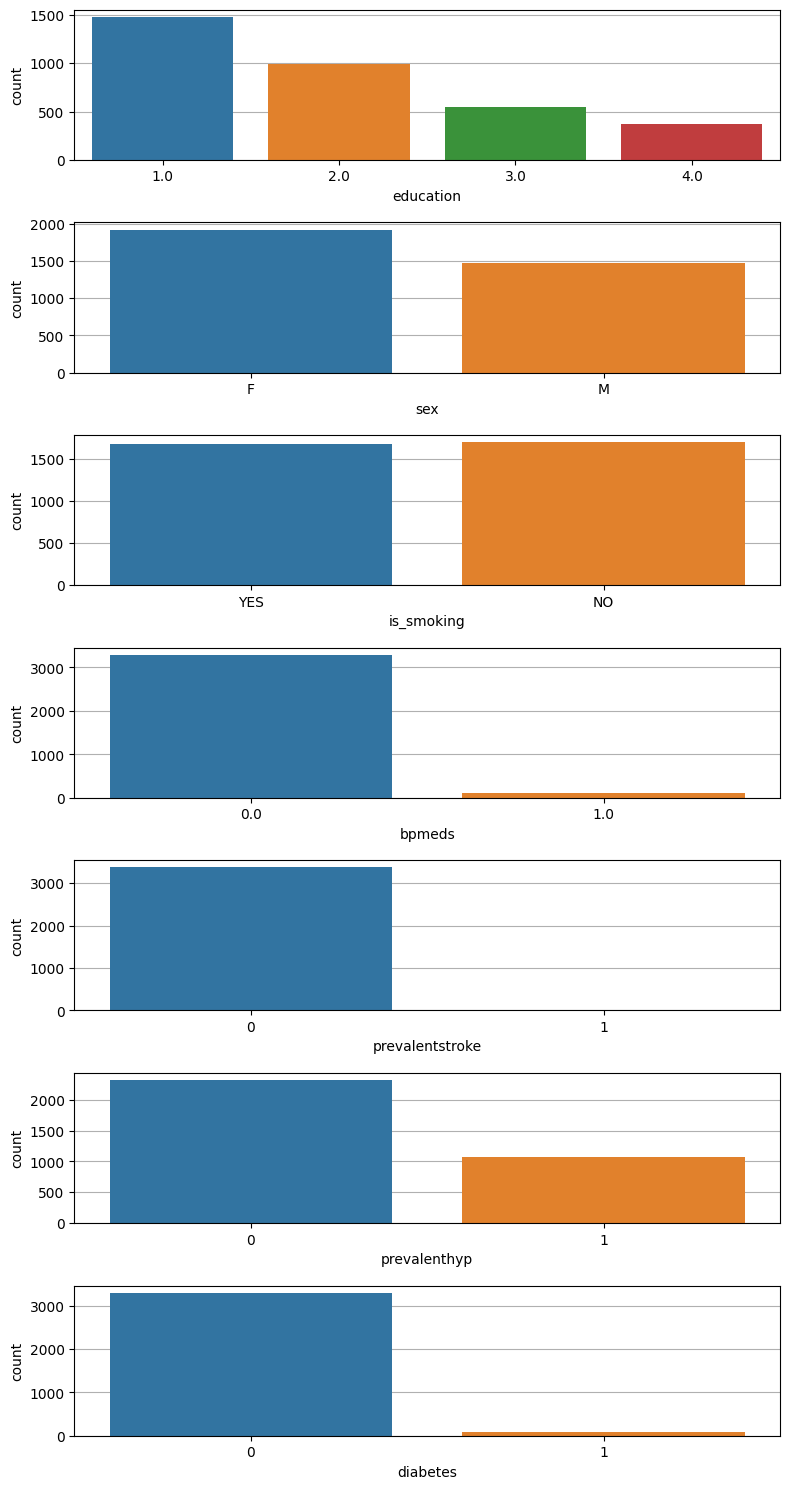

In [34]:
fig, axes = plt.subplots(len(cat_columns), figsize = (8, 15))

for i in range(len(cat_columns)):
  axes[i].yaxis.grid()
  axes[i].set_axisbelow(True)
  sns.countplot(data = df, x = cat_columns[i], ax = axes[i])

plt.tight_layout()

##### 1. Why did you pick the specific chart?

* To check how the values for the categorical independent variables are distributed.

##### 2. What is/are the insight(s) found from the chart?

* There are more females in the dataset than males.
* There is not a huge difference between the number of smokers and non-smokers.
* A huge majority of the patients are not on blood pressure medications.
* Almost all of the patients don't have any history of stroke.
* A good number of patients have a history of hypertension.
* A huge majority of the patients don't have diabetes.


#### Chart - 3: Distribution Plot - Distribution of the Numerical Independent Variables

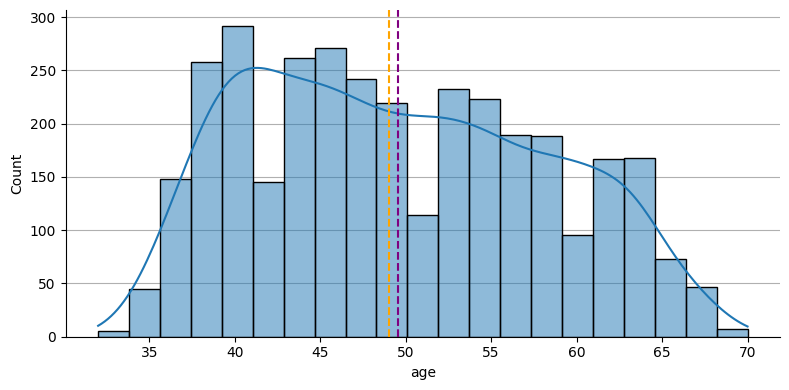

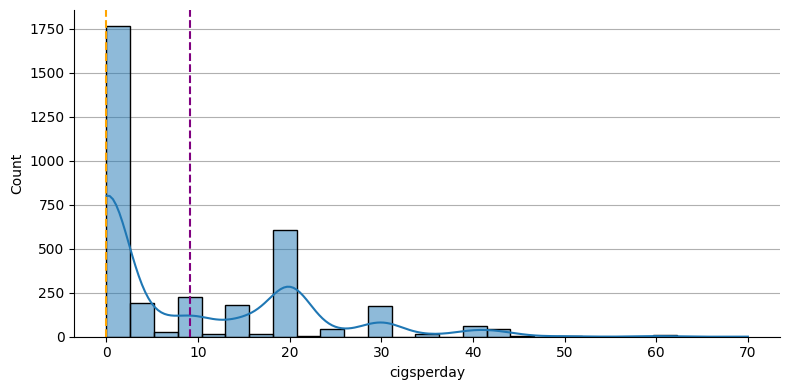

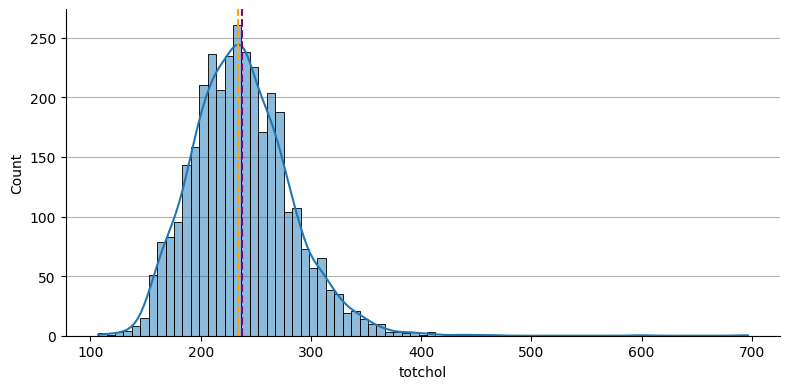

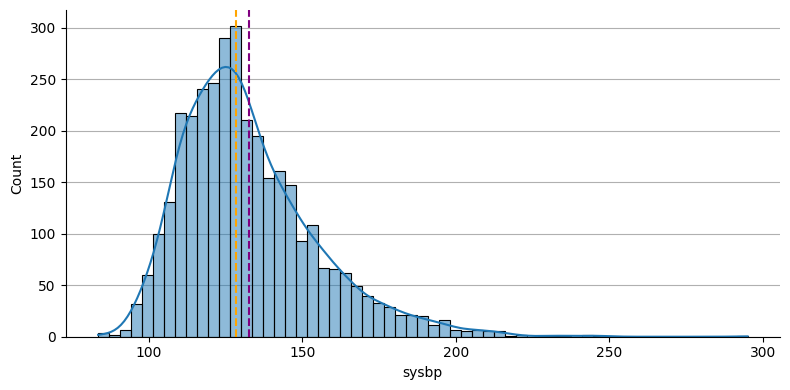

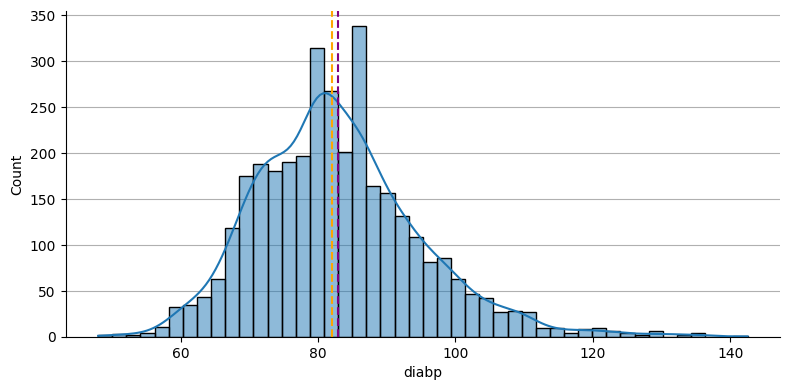

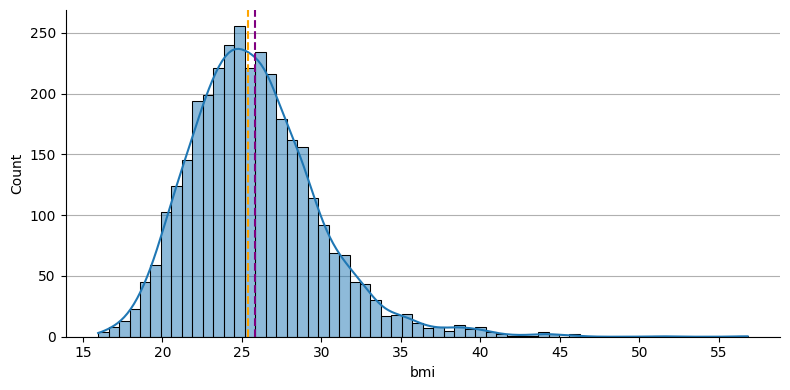

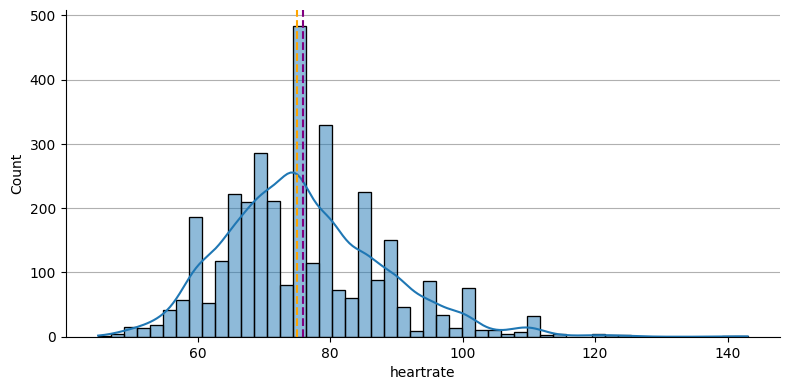

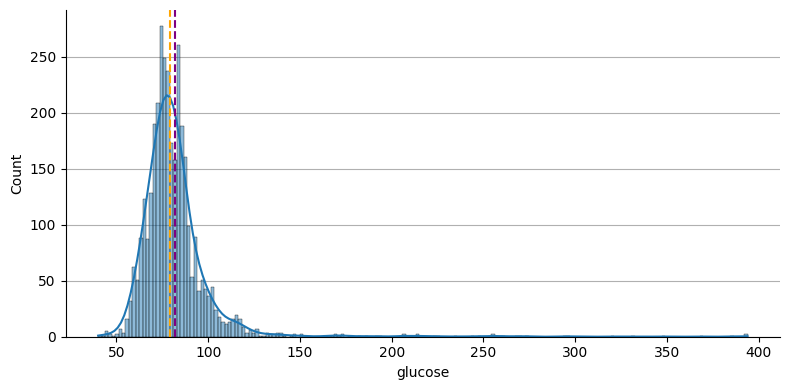

In [35]:
for i in range(len(num_columns)):
  sns.displot(x = df[num_columns[i]], kde = True, height = 4, aspect = 2)
  ax = plt.gca()
  ax.yaxis.grid()
  ax.set_axisbelow(True)
  plt.axvline(df[num_columns[i]].mean(), color = 'purple', linestyle = 'dashed', linewidth = 1.5)   # The purple dashed line signifies the mean.
  plt.axvline(df[num_columns[i]].median(), color = 'orange', linestyle = 'dashed', linewidth=1.5)   # The orange dasehd line signifies the median.
plt.tight_layout()

##### 1. Why did you pick the specific chart?

* To check how the values for the numerical independent variables are distributed.

##### 2. What is/are the insight(s) found from the chart?

* The age of the patients mostly ranges between 35 to 70 years old. Majority of the patients are around 40 years old.
* Majority of the patients don't smoke cigarettes every day.
* The cholestrol level of the patients ranges from 100 to 400.
* The systolic blood pressure of the patients approximately ranges from 100 to 200.
* The diastolic blood pressure of the patients approximately ranges from 60 to 120.
* The BMI of the patients ranges from 15 to 40, with 25 being the average.
* The heartrate of the patients range approximately from 50 to 110.
* The glucose level of the patients range from 50 to 125.

#### Chart - 4: Box Plots - Relationship between the Numerical Independent Variables and the Dependent Variable

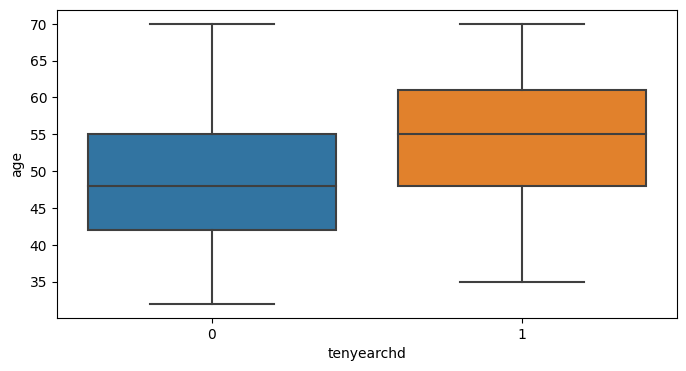

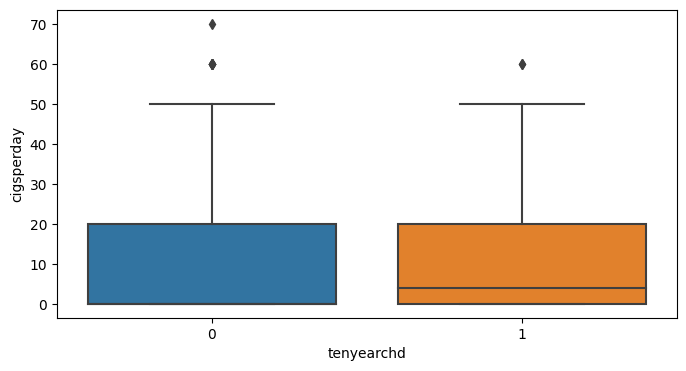

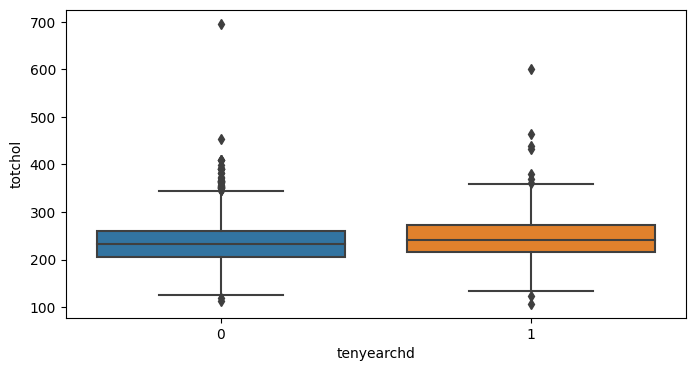

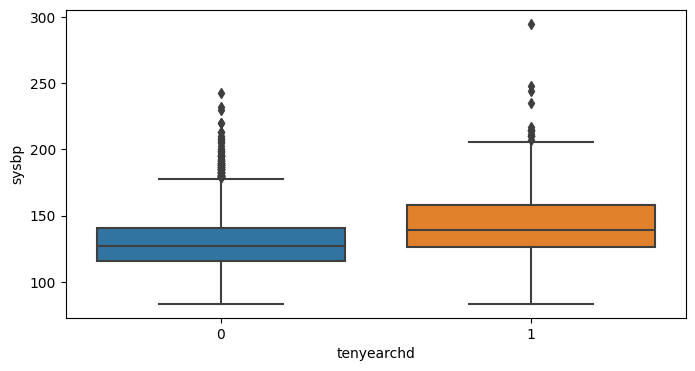

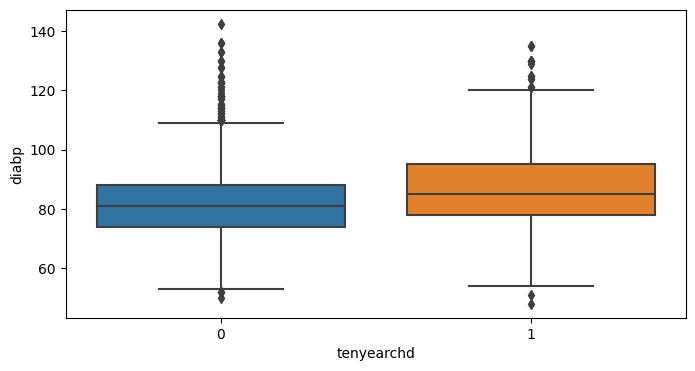

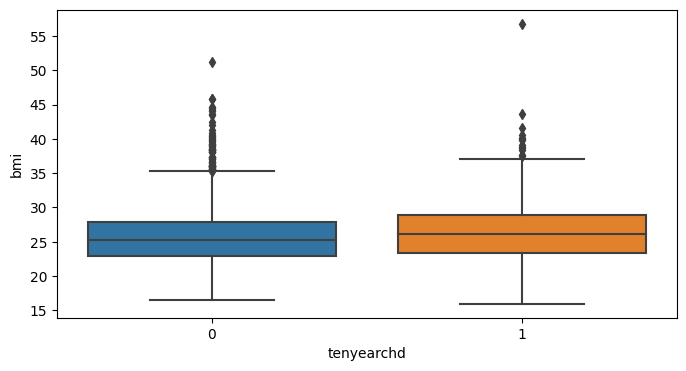

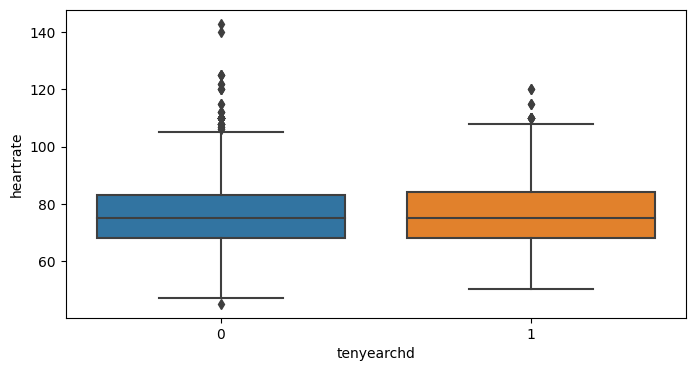

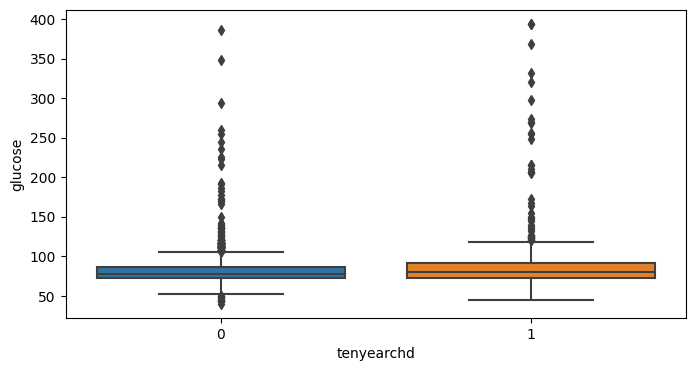

In [36]:
for var in num_columns:
  plt.figure(figsize = (8, 4))
  sns.boxplot(data=df, x = dependent_variable[0], y = var)

##### 1. Why did you pick the specific chart?

* To analyse the relationship between the numerical independent variables and the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

* There is some difference between the target classes on `'age'`.
* A small difference can also be seen between the target classes on `'sysbp'` and `'diabp'`.
* As for the rest of the numerical independent variables there is not any significant difference between the target classes.

#### Chart - 5:  Histograms - Relationship between the Categorical Independent Variables and the Dependent Variable

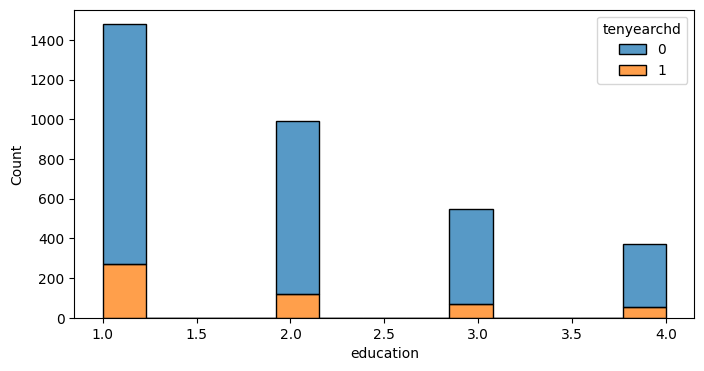

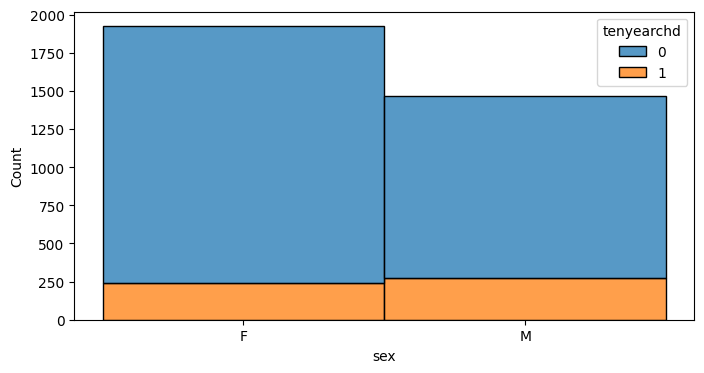

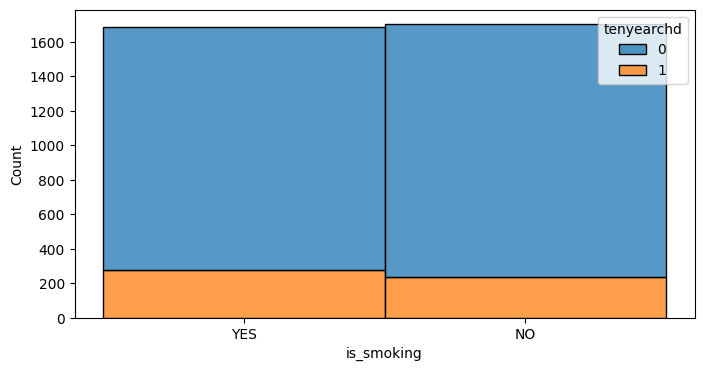

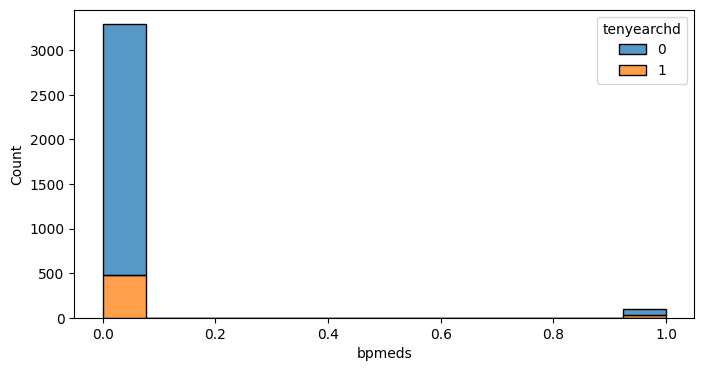

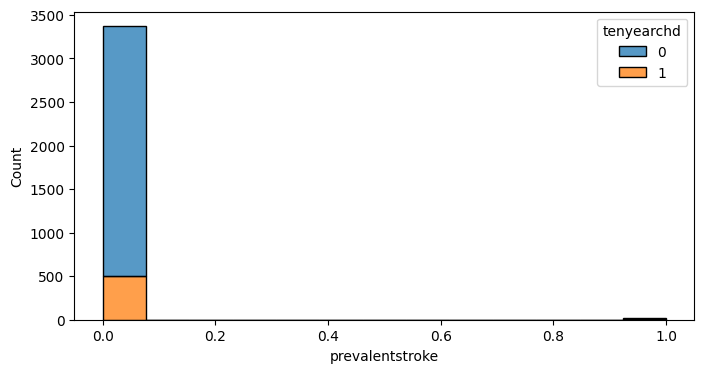

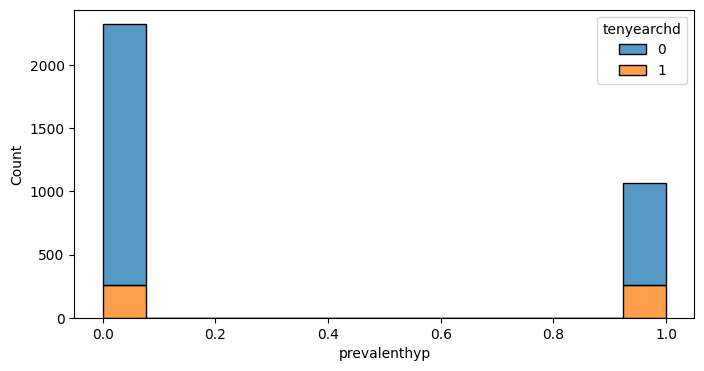

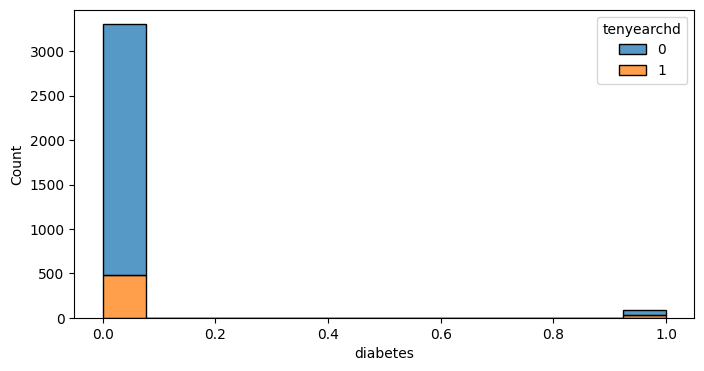

In [37]:
for var in cat_columns:
  plt.figure(figsize = (8, 4))
  sns.histplot(data=df, x = var, hue = dependent_variable[0], multiple = 'stack')

##### 1. Why did you pick the specific chart?

* To analyse the relationship between the categorical independent variables and the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

* Not much conclusive insight can be gained, as either there is not much difference between the target classes on most of the given features, or the features themselves are not equally distributed.

#### Chart - 6 - Correlation Heatmap

<Axes: >

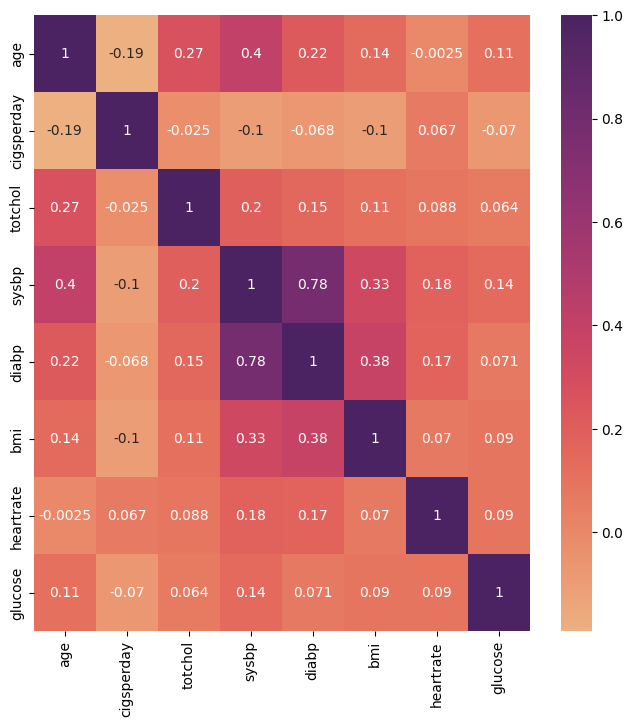

In [38]:
plt.figure(figsize = (8, 8))
sns.heatmap(df[num_columns].corr(), annot = True, cmap = 'flare')

##### 1. Why did you pick the specific chart?

* To find how the numerical variables are correlated to each other.

##### 2. What is/are the insight(s) found from the chart?

* There is a high correlation between `'sysbp'` and `'diabp'`.

#### Chart - 7 - Pair Plot

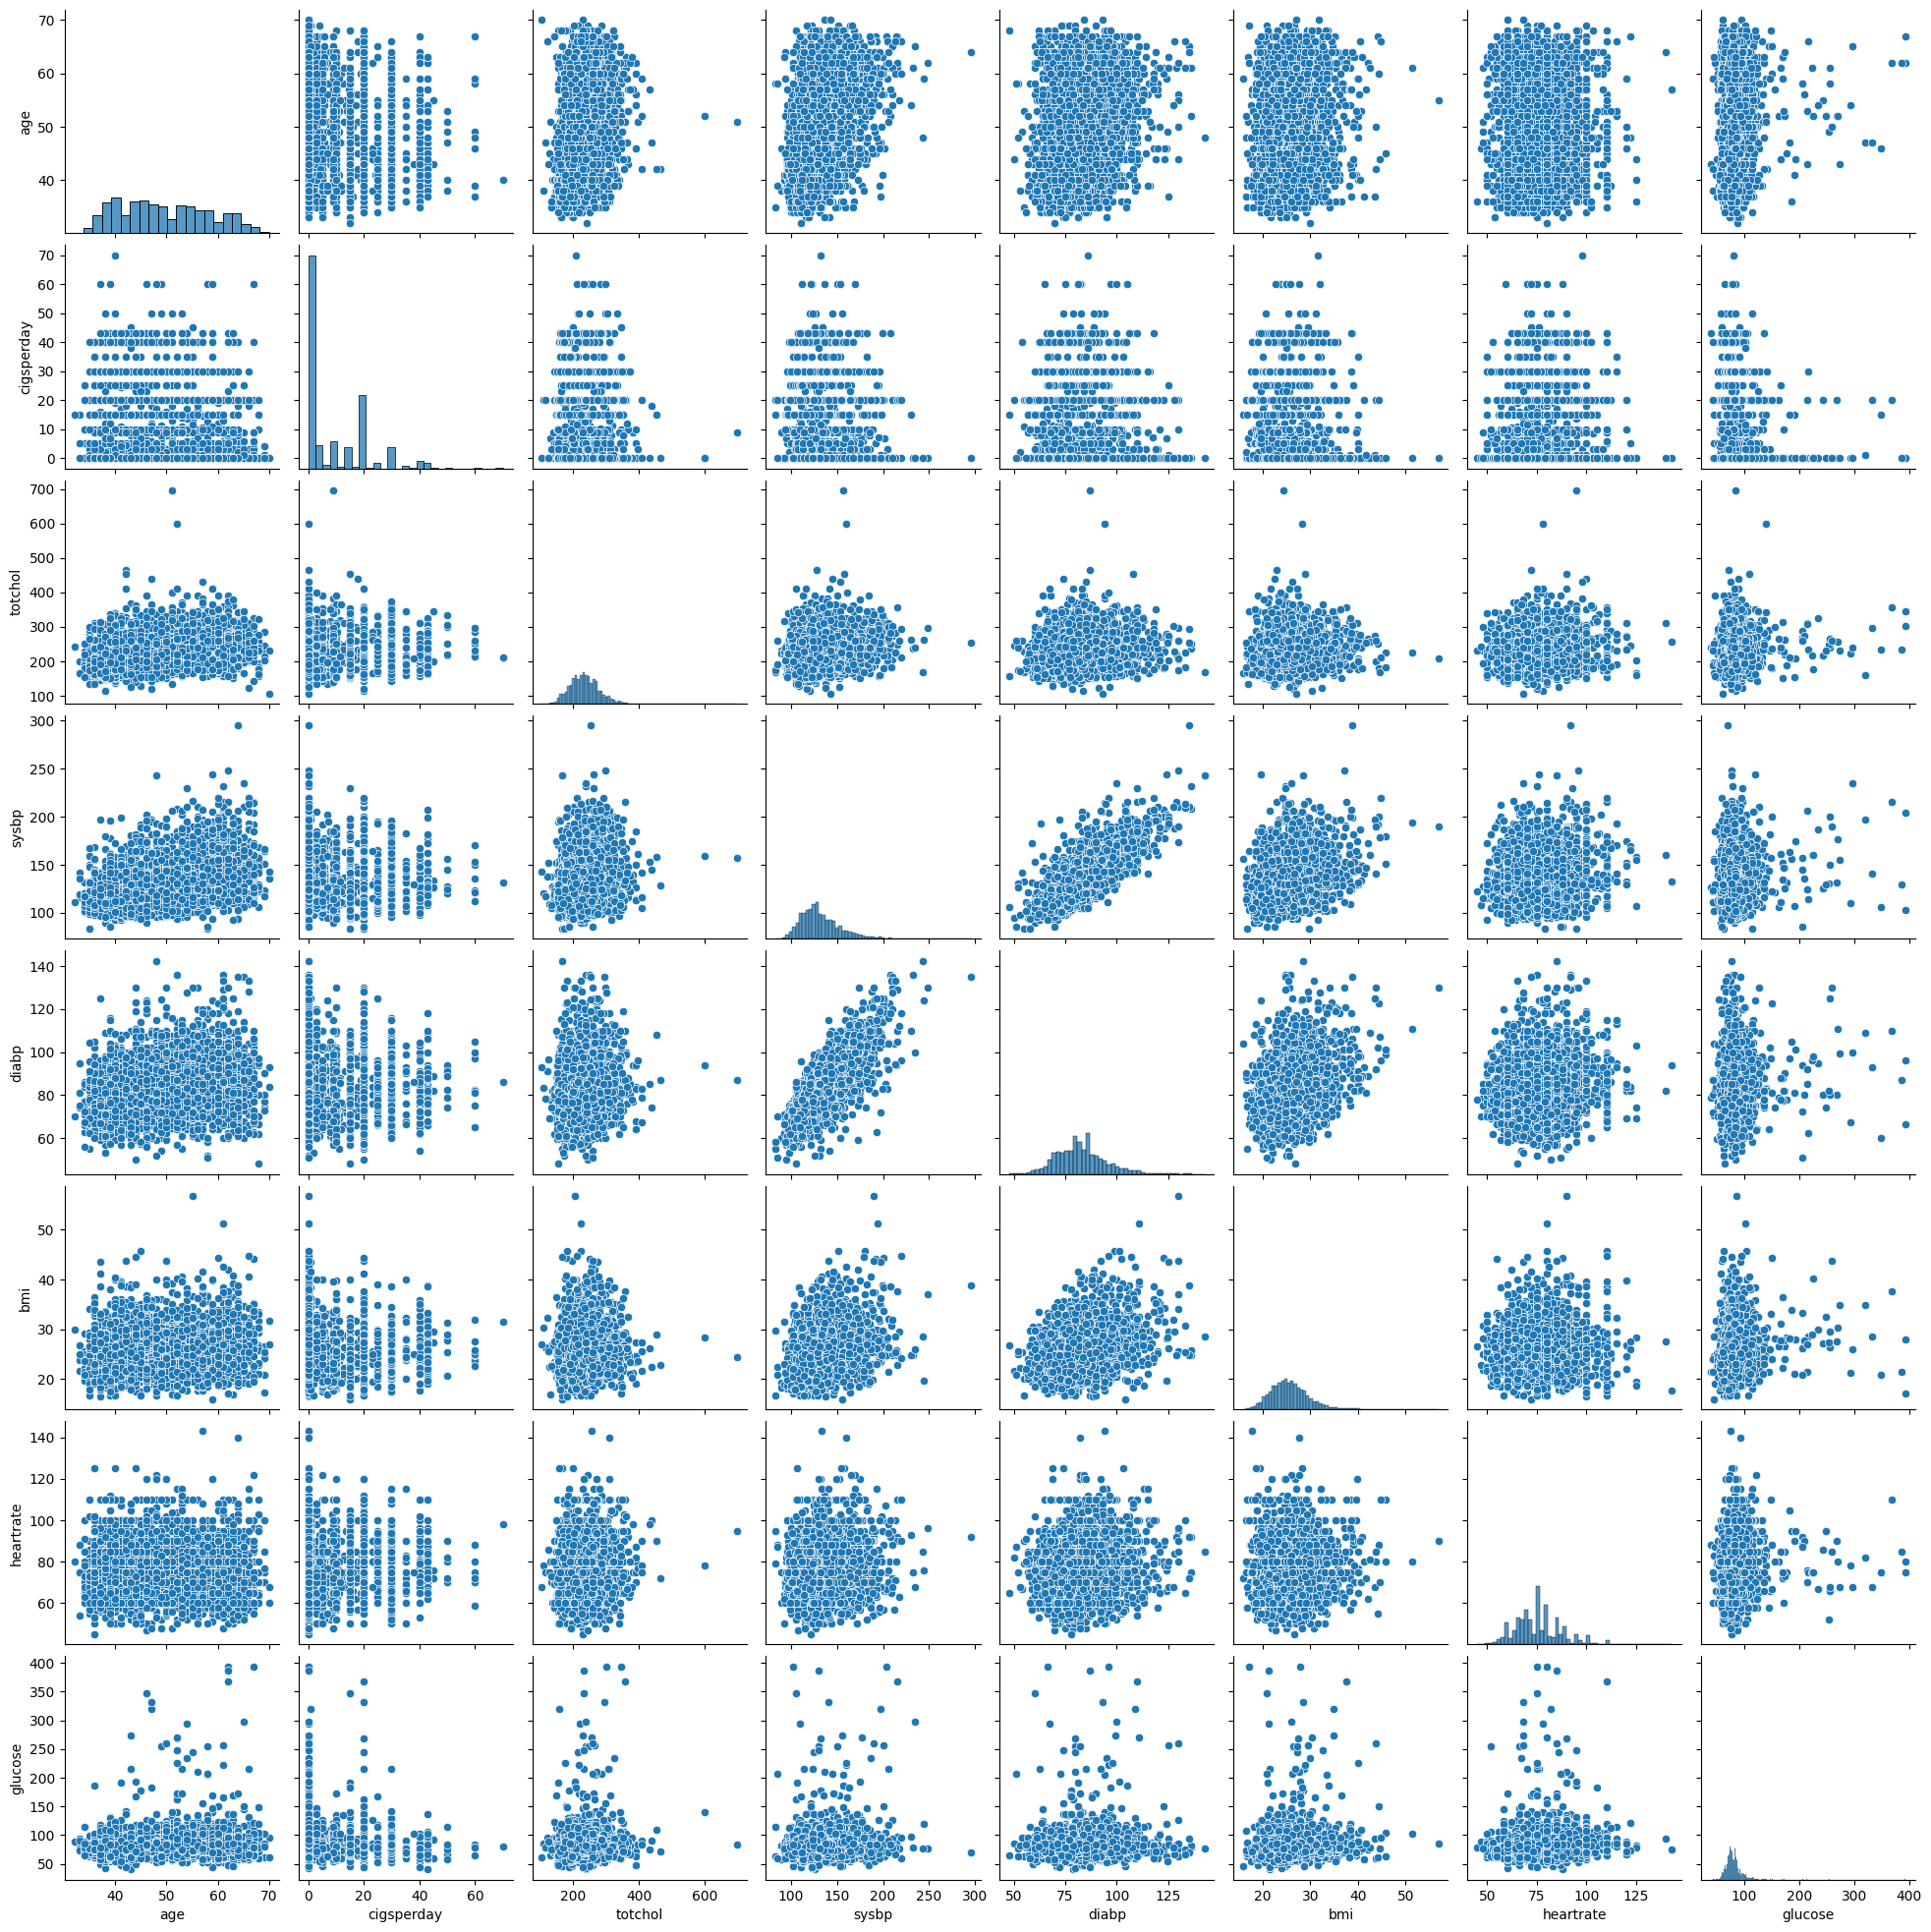

In [39]:
sns.pairplot(df[num_columns])

##### 1. Why did you pick the specific chart?

* To get an overall summary of the relationships between the variables.

##### 2. What is/are the insight(s) found from the chart?

* There is a positive correlation between `'sysbp'` and `'diabp'`.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define hypothetical statements from the dataset and perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Here, `Chi-Square Test` is used to check whether there is relation between the gender of the patient and the risk of developing a coronary heart disease (CHD).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis, H<sub>0</sub> : There is no relationship between the gender and the risk of CHD.
* Alternate Hypothesis, H<sub>A</sub> : There is a relationship between the gender and the risk of CHD.

#### 2. Perform an appropriate statistical test.

In [40]:
# Importing the libraries
from scipy.stats import chi2_contingency

# Creating a contigency table for the variables
table = pd.crosstab(df['sex'], df['tenyearchd'])

# Implementing the Chi-Square test

# The p-value:
p = chi2_contingency(table)[1]

if p < 0.05:
    print('There is a relationship between the gender and the risk of CHD (Null Hypothesis Rejected).')  # Null hypothesis rejected. Alternate Hypothesis accepted.
else:
    print('There is no relationship between the gender and the risk of CHD (Null Hypothesis Not Rejected).') # Null hypothesis not rejected.

print(f'\n(The p-value is: {p})')


There is a relationship between the gender and the risk of CHD (Null Hypothesis Rejected).

(The p-value is: 1.060878293561798e-06)


##### Why did you choose the specific statistical test?

* Chi-Square Test is a statistical test used to check whether there is a significant rleationship between two categorical variables.

### Hypothetical Statement - 2

Here, `Chi-Square Test` is used to check whether there is relation between the education level of the patient and the risk of developing a coronary heart disease (CHD).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis, H<sub>0</sub> : There is no relationship between the education level and the risk of CHD.
* Alternate Hypothesis, H<sub>A</sub> : There is a relationship between the education level and the risk of CHD.

#### 2. Perform an appropriate statistical test.

In [41]:
# Creating a contigency table for the variables
table = pd.crosstab(df['education'], df['tenyearchd'])

# Implementing the Chi-Square test

# The p-value:
p = chi2_contingency(table)[1]

if p < 0.05:
    print('There is a relationship between the education level and the risk of CHD (Null Hypothesis Rejected).')  # Null hypothesis rejected. Alternate Hypothesis accepted.
else:
    print('There is no relationship between the education level and the risk of CHD (Null Hypothesis Not Rejected).') # Null hypothesis not rejected.

print(f'\n(The p-value is: {p})')

There is a relationship between the education level and the risk of CHD (Null Hypothesis Rejected).

(The p-value is: 8.69389071714776e-05)


##### Why did you choose the specific statistical test?

* Chi-Square Test is a statistical test used to check whether there is a significant rleationship between two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
"The issue of missing values in the dataset was taken care of in the 'Data Wrangling' part."

"The issue of missing values in the dataset was taken care of in the 'Data Wrangling' part."

#### What all missing value imputation techniques have you used and why did you use those techniques?

* For the missing values under the categorical columns, the missing values were imputed with the corresponding modes, i.e. most frequent value.
* For the missing values under the numerical columns, the missing values were imputed with the corresponding medians, as the distribution of the features were skewed so imputation of the mean values was not preferred.

### 2. Handling Outliers

<Axes: >

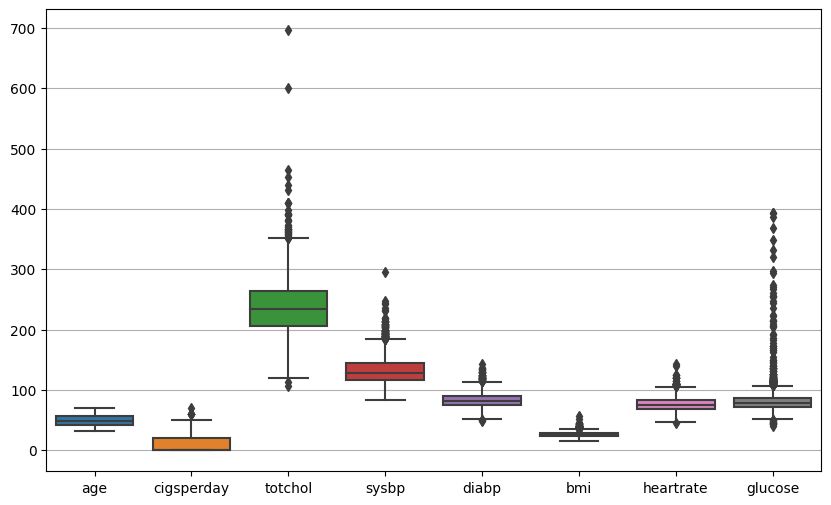

In [43]:
# Checking the outliers in all the numerical columns
plt.figure(figsize = (10, 6))
plt.grid()
sns.boxplot(df[num_columns])

In [44]:
for var in num_columns:
  q1 = df[var].quantile(0.25)   # The first quartile
  q2 = df[var].quantile(0.50)   # The second quartile or the median
  q3 = df[var].quantile(0.75)   # The third quartile

  iqr = q3 - q1   # Interquartile range

  lower_limit = q1 - 1.5*iqr   # Any point less than this limit will be considered as an outlier
  upper_limit = q3 + 1.5*iqr   # Any point more than this limit will be considered as an outlier

  df[var] = np.where(df[var] > upper_limit, upper_limit, np.where(df[var] < lower_limit, lower_limit, df[var]))


<Axes: >

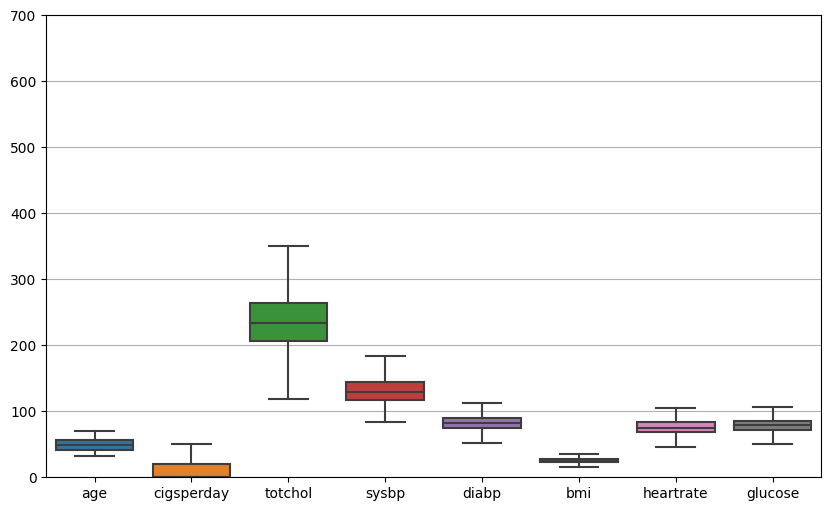

In [45]:
plt.figure(figsize = (10, 6))
plt.ylim(0, 700)
plt.grid()
sns.boxplot(df[num_columns])

In [46]:
df.shape

(3390, 17)

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Any value less than the lower limit value (q1 - 1.5\*iqr) was `floored` at the lower limit value and any value more than the upper limit value (q2 + 1.5\*iqr) was `capped` at the upper limit value.
* This technique was used for the outlier treatment to avoid any removal of the rows containing the outliers, as it may also lead in the removal of the rows with a high TenYearCHD risk.

### 3. Categorical Encoding

In [47]:
# Using one-hot encoding to encode the 'sex' column
df = pd.get_dummies(df, columns = ['sex'])

In [48]:
df.head()

,id,age,education,is_smoking,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd,sex_F,sex_M
0,0,64.0,2.0,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,28.536,90.0,80.0,1,1,0
1,1,36.0,4.0,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770,72.0,75.0,0,0,1
2,2,46.0,1.0,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350,88.0,94.0,0,1,0
3,3,50.0,1.0,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260,68.0,94.0,1,0,1
4,4,64.0,1.0,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420,70.0,77.0,0,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

* One-hot encoding was used to encode the `'sex'` column to get nominal numbers.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Note: There is term called "Pulse Pressure" which is basically the difference between the systolic and the diastolic blood pressure.

As the features `'sysbp'` and `'diabp'` are correlated, it would be better to combine them to form a new feature called `'pulse_pressure'`.

In [49]:
# Creating a new feature called 'pulsepressure'
df['pulse_pressure'] = df['sysbp'] - df['diabp']

In [50]:
# Converting the datatype of the 'education' column from float to int
df['education'] = df['education'].astype(int)

#### 2. Feature Selection

In [51]:
# As the features 'sysbp' and 'diabp' are no longer needed, it is better to drop them
df.drop(['sysbp', 'diabp'], axis = 1, inplace = True)

In [52]:
# Removing the 'is_smoking' column because the relevant information regarding a person's smoking habit can be determined from 'cigsperday' column itself
df.drop('is_smoking', axis = 1, inplace = True)

In [53]:
# Dropping the 'id' column because it is irrelevant
df.drop('id', axis = 1, inplace = True)

In [54]:
# Reassigning the independent variables and dependent variable
dependent_variable = ['tenyearchd']
independent_variables = df.columns.tolist()
independent_variables.remove('tenyearchd')

##### What all feature selection methods have you used  and why?

* As the features `'sysbp'` and `'diabp'` are correlated, they were merged into one single feature called `'pulse_pressure'`.
* The features `'sysbp'` and `'diabp'` were removed because as they were no longer needed.
* The feature `'is_smoking'` was dropped because all the relevant data from the feature could be found in the `'cigsperday'` feature.
* The feature `'id'` was dropped because it is not needed.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [55]:
# The list of numerical column names after the feature manipulation and selection
num_columns = ['age', 'cigsperday', 'totchol', 'bmi', 'heartrate', 'glucose', 'pulse_pressure']

# Checking the skew for the numerical features
df[num_columns].skew()

age               0.225796
cigsperday        1.146447
totchol           0.336375
bmi               0.451720
heartrate         0.417905
glucose           0.457234
pulse_pressure    0.946833
dtype: float64

In [56]:
# Implementing log transformation to take care of the skewness
df[num_columns] = np.log10(df[num_columns] + 1)

In [57]:
# Checking the skew for the numerical features after the log transformation
df[num_columns].skew()

age              -0.015053
cigsperday        0.278095
totchol          -0.160103
bmi               0.073432
heartrate         0.027675
glucose           0.057536
pulse_pressure    0.168465
dtype: float64

* To get rid of the skewness in the numerical features, low transformation was used, and the skewness was reduced to an extent after the transformation.

### 6. Data Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[num_columns] = scaler.fit_transform(df[num_columns])

##### Which method have you used to scale you data and why?

* A Standard Scaler was used here to standardise the numerical features because the the numerical features in the dataset had different ranges.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

* Dimensionality Reduction is not required here because all the existing features are termed important.

### 8. Data Splitting

In [59]:
X = df[independent_variables]
y = df[dependent_variable]

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 0)

##### What data splitting ratio have you used and why?

* An 80:20 splitting ratio is being used. The ML models will require a good amount of data to learn, hence the high ratio of 80% for the training dataset, and a ratio of 20% is fine for evaluating the model. Stratification is also implemented here, it will ensure that each split contains a representative distribution of the original data.

### 9. Handling Imbalanced Dataset

tenyearchd
0             2303
1              409
dtype: int64


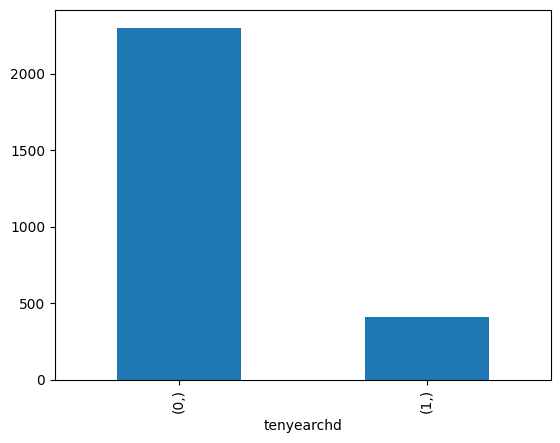

In [61]:
# Counting the number of target classes in the dependent variable for the training dataset
y_train.value_counts().plot(kind = 'bar')
print(y_train.value_counts())

##### Do you think the dataset is imbalanced? Explain Why.

* Yes, the dataset is imbalanced, as a huge number of points belong to target class of 0, and very few belong to the target class of 1.

In [62]:
# Implementing the oversampling technique SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train, y_train)

tenyearchd
0             2303
1             2303
dtype: int64


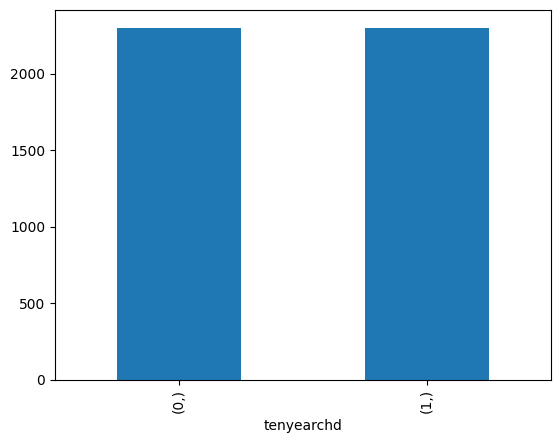

In [63]:
# Counting the number of target classes in the dependent variable for the training dataset after the oversampling
y_train.value_counts().plot(kind = 'bar')
print(y_train.value_counts())

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

* The oversampling technique of SMOTE (Synthetic Minority Oversampling Technique) was implemented to handle the class imbalance because a balanced class distribution is very much required for the smooth functioning of the ML models. The majority class overshadowed the minority class by a huge margin, so it was decided to implement the oversampling on the minority class.

In [127]:
# Counting the number of target classes in the dependent variable for the testing dataset
print(y_test.value_counts())

tenyearchd
0             576
1             102
dtype: int64


## ***7. ML Model Implementation***

The following ML Models were implemented:
1. Logistic Regression
2. Decision Trees
3. K-Nearest Neighbors
4. Random Forest
5. Support Vector Machine
6. XGBoost

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Creating a function to generate the necessary evaluation metrics
def eval(model, X_train, X_test, y_train, y_test, name):

  # Predictions of the training and testing datasets
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  # Class probabilities of the training and testing datasets
  train_proba = model.predict_proba(X_train)
  test_proba = model.predict_proba(X_test)

  # Evaluation metrics
  train_accuracy = accuracy_score(y_train, train_pred)
  test_accuracy = accuracy_score(y_test, test_pred)

  train_precision = precision_score(y_train, train_pred)
  test_precision = precision_score(y_test, test_pred)

  train_recall = recall_score(y_train, train_pred)
  test_recall = recall_score(y_test, test_pred)

  train_f1 = f1_score(y_train, train_pred)
  test_f1 = f1_score(y_test, test_pred)

  train_roc_auc = roc_auc_score(y_train, train_pred)
  test_roc_auc = roc_auc_score(y_test, test_pred)

  # Creating a dataframe to store all the metrics for the model
  eval_df = pd.DataFrame([train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1, train_roc_auc, test_roc_auc],
                         index = ['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall',
                                  'Train F1-Score', 'Test F1-Score','Train ROC-AUC', 'Test ROC-AUC'],
                         columns = [name])

  # Creating Confusion Matrices
  cm_train = confusion_matrix(y_train, train_pred)
  cm_test = confusion_matrix(y_test, test_pred)

  return eval_df, cm_train, cm_test


In [65]:
# Creating a function for plotting the confusion matrices

def conmat(cm_train, cm_test, name):
  fig, axes = plt.subplots(1, 2, figsize = (15, 5))
  plt.suptitle(f"Confusion Matrices ({name})")

  sns.heatmap(cm_train, ax = axes[0], annot = True, fmt = '.6g', xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'], cmap = 'flare', linewidth = 0.5, linecolor = 'black')
  axes[0].set_title('Training Dataset')
  axes[0].set_xlabel('Predicted Labels')
  axes[0].set_ylabel('True Labels')

  sns.heatmap(cm_test, ax = axes[1], annot = True, fmt = '.6g', xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'], cmap = 'flare', linewidth = 0.5, linecolor = 'black')
  axes[1].set_title('Testing Dataset')
  axes[1].set_xlabel('Predicted Labels')
  axes[1].set_ylabel('True Labels')


### ML Model - 1: Logistic Regression

In [66]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)

# Fit the Algorithm
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [67]:
# Checking the parameters
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

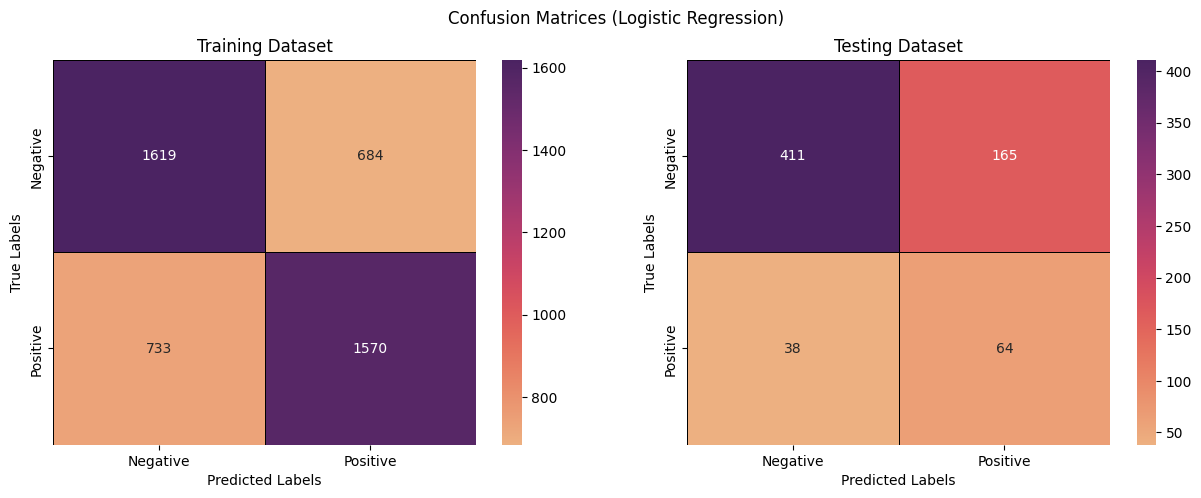

In [68]:
lr_eval_df, lr_cm_train, lr_cm_test = eval(lr, X_train, X_test, y_train, y_test, 'Logistic Regression')

# Generating the confusion matrices
conmat(lr_cm_train, lr_cm_test, 'Logistic Regression')

In [69]:
# Summary of all the necessary evaluation metrics
lr_eval_df

,Logistic Regression
Train Accuracy,0.692358
Test Accuracy,0.700590
Train Precision,0.696539
Test Precision,0.279476
Train Recall,0.681719
Test Recall,0.627451
Train F1-Score,0.689050
Test F1-Score,0.386707
Train ROC-AUC,0.692358
Test ROC-AUC,0.670496


#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

sk = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

lr_param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10]}

lr_gscv = GridSearchCV(lr, param_grid = lr_param_grid, cv = sk, scoring = 'recall')

# Fit the Algorithm
lr_gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall')

In [71]:
# Finding the best parameter values
lr_gscv.best_params_

{'C': 0.1, 'penalty': 'l2'}

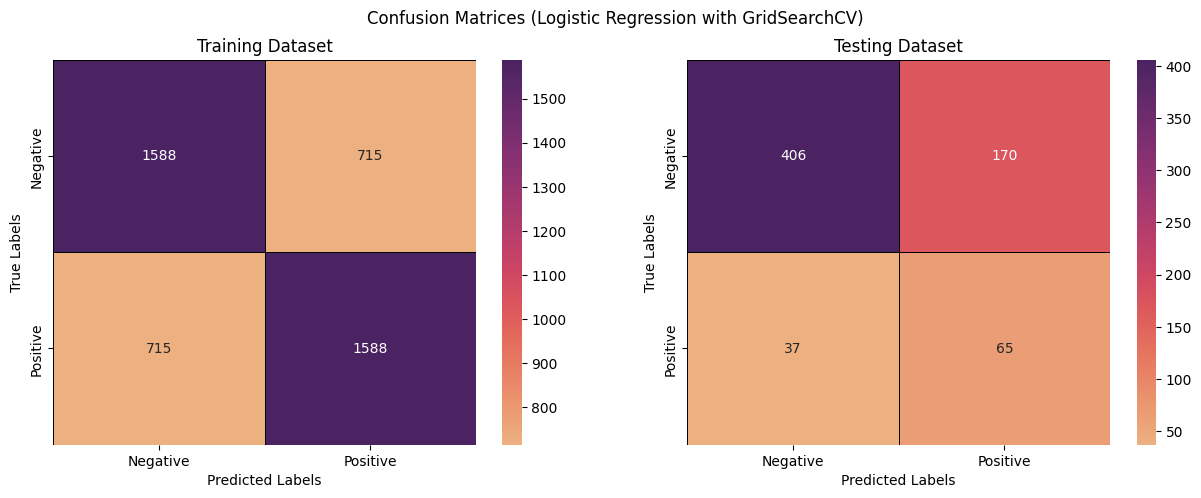

In [72]:
lr_gscv_eval_df, lr_gscv_cm_train, lr_gscv_cm_test = eval(lr_gscv, X_train, X_test, y_train, y_test, 'Logistic Regression with GridSearchCV')

# Generating the confusion matrices
conmat(lr_gscv_cm_train, lr_gscv_cm_test, 'Logistic Regression with GridSearchCV')

In [73]:
# The evaluation metric score chart
lr_gscv_eval_df

,Logistic Regression with GridSearchCV
Train Accuracy,0.689535
Test Accuracy,0.694690
Train Precision,0.689535
Test Precision,0.276596
Train Recall,0.689535
Test Recall,0.637255
Train F1-Score,0.689535
Test F1-Score,0.385757
Train ROC-AUC,0.689535
Test ROC-AUC,0.671058


##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV with Stratified K-Fold cross validator was used. The stratification ensures that each fold contains a representative distribution of the target. As we are dealing with a classfication problem, it is important to maintain the same target class distribution in each fold to prevent bias.

In [74]:
# Merging the dataframes containing the evaluation metrics for comparision
pd.concat([lr_eval_df, lr_gscv_eval_df], axis = 1)

,Logistic Regression,Logistic Regression with GridSearchCV
Train Accuracy,0.692358,0.689535
Test Accuracy,0.700590,0.694690
Train Precision,0.696539,0.689535
Test Precision,0.279476,0.276596
Train Recall,0.681719,0.689535
Test Recall,0.627451,0.637255
Train F1-Score,0.689050,0.689535
Test F1-Score,0.386707,0.385757
Train ROC-AUC,0.692358,0.689535
Test ROC-AUC,0.670496,0.671058


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The issue of overfitting on the training dataset is reduced by some extent after the hyperparameter tuning. The hyperparameter-tuned model has improved Recall, F-1 and ROC-AUC scores on the testing dataset. So, the model's performance appears to have slightly improved under hyperparameter tuning.

### ML Model - 2: Decision Tree

In [75]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 0)

# Fit the Algorithm
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [76]:
# Checking the parameters
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

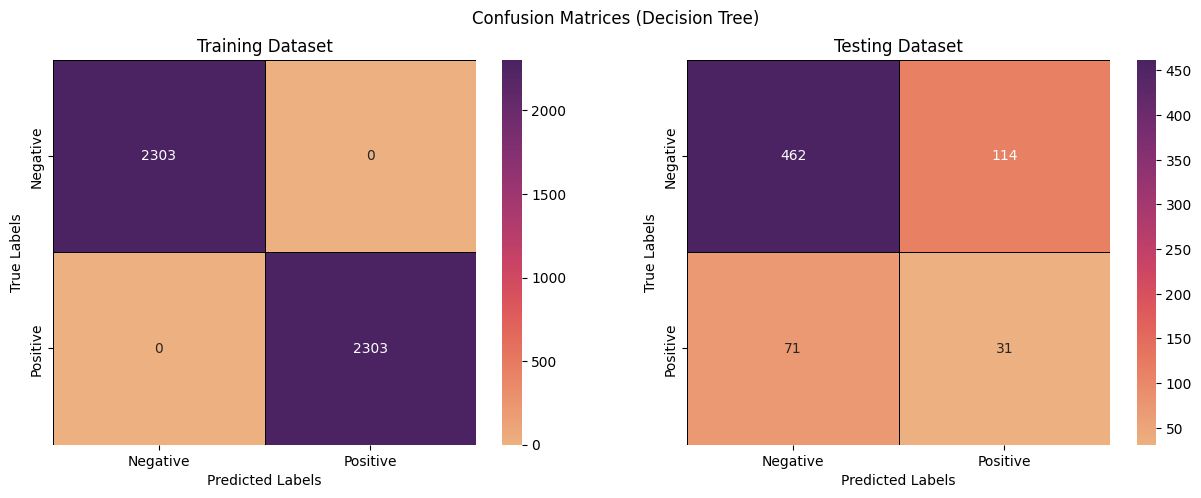

In [77]:
dt_eval_df, dt_cm_train, dt_cm_test = eval(dt, X_train, X_test, y_train, y_test, 'Decision Tree')

# Generating the confusion matrices
conmat(dt_cm_train, dt_cm_test, 'Decision Tree')

In [78]:
# The evaluation metric score chart
dt_eval_df

,Decision Tree
Train Accuracy,1.000000
Test Accuracy,0.727139
Train Precision,1.000000
Test Precision,0.213793
Train Recall,1.000000
Test Recall,0.303922
Train F1-Score,1.000000
Test F1-Score,0.251012
Train ROC-AUC,1.000000
Test ROC-AUC,0.553002


#### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

sk = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

dt_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [4, 8, 10], 'min_samples_split': [2, 4, 8], 'min_samples_leaf': [4, 8, 10]}
dt_gscv = GridSearchCV(dt, param_grid = dt_param_grid, cv = sk, scoring = 'recall')

# Fit the Algorithm
dt_gscv.fit(X_test, y_test)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 10],
                         'min_samples_leaf': [4, 8, 10],
                         'min_samples_split': [2, 4, 8]},
             scoring='recall')

In [80]:
# Finding the best parameter values
dt_gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

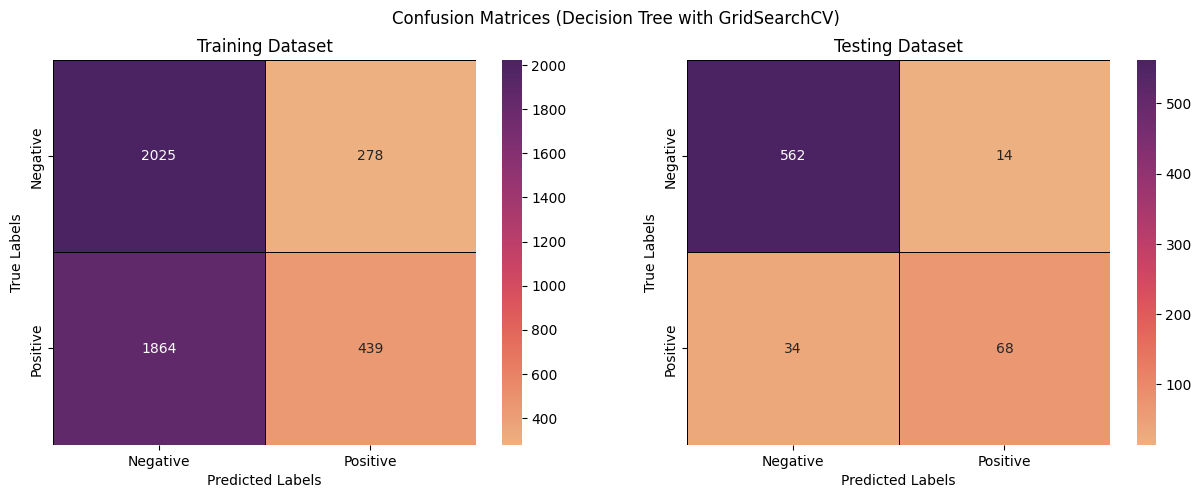

In [81]:
dt_gscv_eval_df, dt_gscv_cm_train, dt_gscv_cm_test = eval(dt_gscv, X_train, X_test, y_train, y_test, 'Decision Tree with GridSearchCV')

# Generating the confusion matrices
conmat(dt_gscv_cm_train, dt_gscv_cm_test, 'Decision Tree with GridSearchCV')

In [82]:
# The evaluation metric score chart
dt_gscv_eval_df

,Decision Tree with GridSearchCV
Train Accuracy,0.534954
Test Accuracy,0.929204
Train Precision,0.612273
Test Precision,0.829268
Train Recall,0.190621
Test Recall,0.666667
Train F1-Score,0.290728
Test F1-Score,0.739130
Train ROC-AUC,0.534954
Test ROC-AUC,0.821181


##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV with Stratified K-Fold cross validator was used. The stratification ensures that each fold contains a representative distribution of the target. As we are dealing with a classfication problem, it is important to maintain the same target class distribution in each fold to prevent bias.

In [83]:
# Merging the dataframes containing the evaluation metrics for comparision
pd.concat([dt_eval_df, dt_gscv_eval_df], axis = 1)

,Decision Tree,Decision Tree with GridSearchCV
Train Accuracy,1.000000,0.534954
Test Accuracy,0.727139,0.929204
Train Precision,1.000000,0.612273
Test Precision,0.213793,0.829268
Train Recall,1.000000,0.190621
Test Recall,0.303922,0.666667
Train F1-Score,1.000000,0.290728
Test F1-Score,0.251012,0.739130
Train ROC-AUC,1.000000,0.534954
Test ROC-AUC,0.553002,0.821181


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The hyperparameter-tuned model has significantly improved all of its evaluation metrics on the testing dataset and the issue of overfiiting on the training dataset has been reduced too. So, it seems that the hyperparameter tuning has improved the model's performance.

### ML Model - 3 - K-Nearest Neighbors

In [84]:
# ML Model - 3 Implementation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the Algorithm
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
# Checking the parameters
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

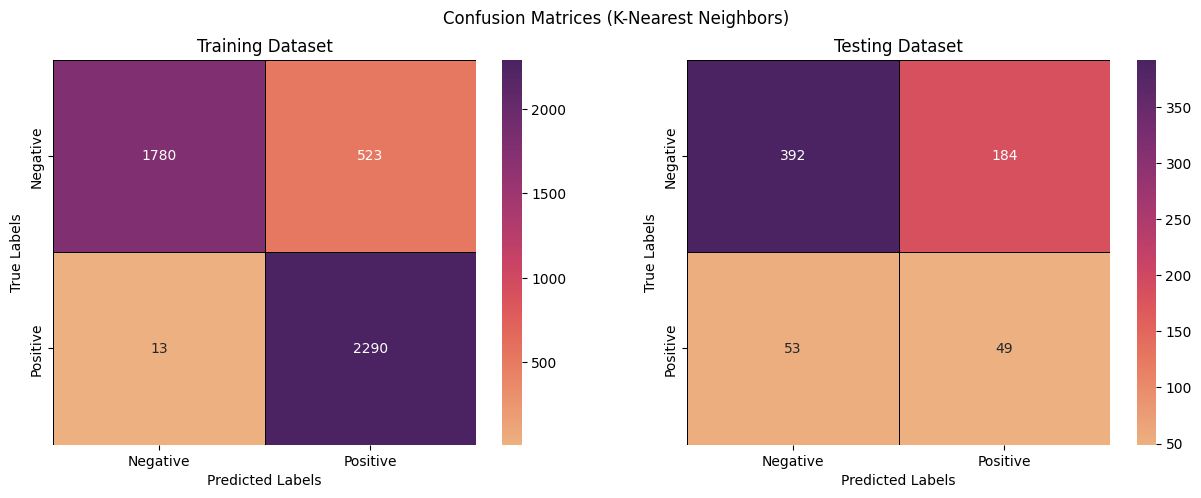

In [86]:
knn_eval_df, knn_cm_train, knn_cm_test = eval(knn, X_train, X_test, y_train, y_test, 'K-Nearest Neighbors')

# Generating the confusion matrices
conmat(knn_cm_train, knn_cm_test, 'K-Nearest Neighbors')

In [87]:
# The evaluation metric score chart
knn_eval_df

,K-Nearest Neighbors
Train Accuracy,0.883630
Test Accuracy,0.650442
Train Precision,0.814077
Test Precision,0.210300
Train Recall,0.994355
Test Recall,0.480392
Train F1-Score,0.895231
Test F1-Score,0.292537
Train ROC-AUC,0.883630
Test ROC-AUC,0.580474


#### 2. Cross- Validation & Hyperparameter Tuning

In [88]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
sk = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

knn_param_grid = {'n_neighbors': [4, 5, 6, 8, 10, 15, 20], 'weights' : ['uniform','distance'], 'metric': ['minkowski','euclidean','manhattan']}

knn_gscv = GridSearchCV(knn, param_grid = knn_param_grid, cv = sk, scoring = 'recall')

# Fit the Algorithm
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [4, 5, 6, 8, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [89]:
# Finding the best parameter values
knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

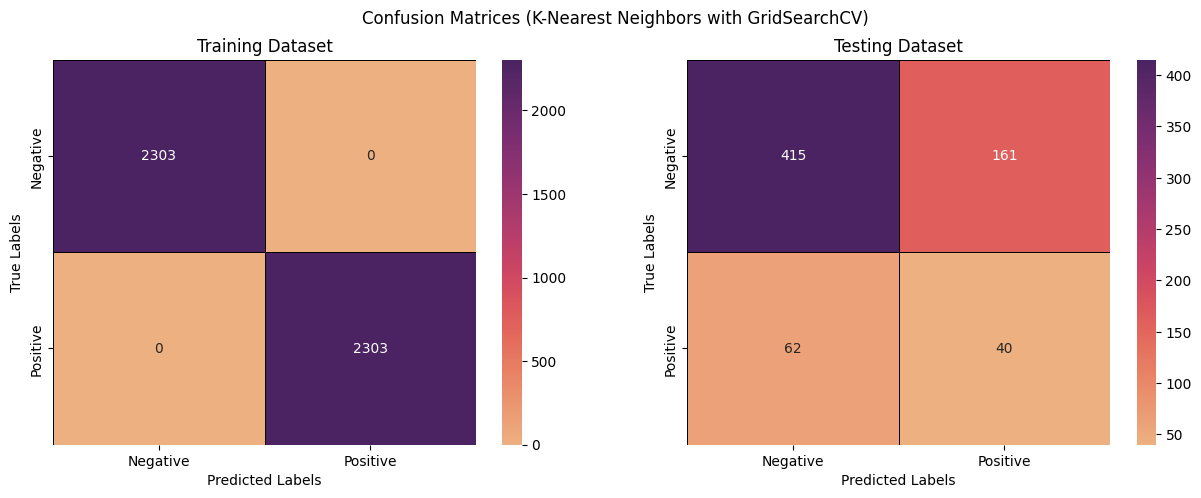

In [90]:
knn_gscv_eval_df, knn_gscv_cm_train, knn_gscv_cm_test = eval(knn_gscv, X_train, X_test, y_train, y_test, 'K-Nearest Neighbors with GridSearchCV')

# Generating the confusion matrices
conmat(knn_gscv_cm_train, knn_gscv_cm_test, 'K-Nearest Neighbors with GridSearchCV')

In [91]:
# The evaluation metric score chart
knn_gscv_eval_df

,K-Nearest Neighbors with GridSearchCV
Train Accuracy,1.000000
Test Accuracy,0.671091
Train Precision,1.000000
Test Precision,0.199005
Train Recall,1.000000
Test Recall,0.392157
Train F1-Score,1.000000
Test F1-Score,0.264026
Train ROC-AUC,1.000000
Test ROC-AUC,0.556321


##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV with Stratified K-Fold cross validator was used. The stratification ensures that each fold contains a representative distribution of the target. As we are dealing with a classfication problem, it is important to maintain the same target class distribution in each fold to prevent bias.

In [92]:
# Merging the dataframes containing the evaluation metrics for comparision
pd.concat([knn_eval_df, knn_gscv_eval_df], axis = 1)

,K-Nearest Neighbors,K-Nearest Neighbors with GridSearchCV
Train Accuracy,0.883630,1.000000
Test Accuracy,0.650442,0.671091
Train Precision,0.814077,1.000000
Test Precision,0.210300,0.199005
Train Recall,0.994355,1.000000
Test Recall,0.480392,0.392157
Train F1-Score,0.895231,1.000000
Test F1-Score,0.292537,0.264026
Train ROC-AUC,0.883630,1.000000
Test ROC-AUC,0.580474,0.556321


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* A little improvement in all the evaluation metrics on the testing dataset can be observed. But the hyperparameter-tuned model seems to be prone to overfitting on the training dataset.

### ML Model - 4: Random Forest

In [93]:
# ML Model - 4 Implementation
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0)

# Fit the Algorithm
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [94]:
# Checking the parameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

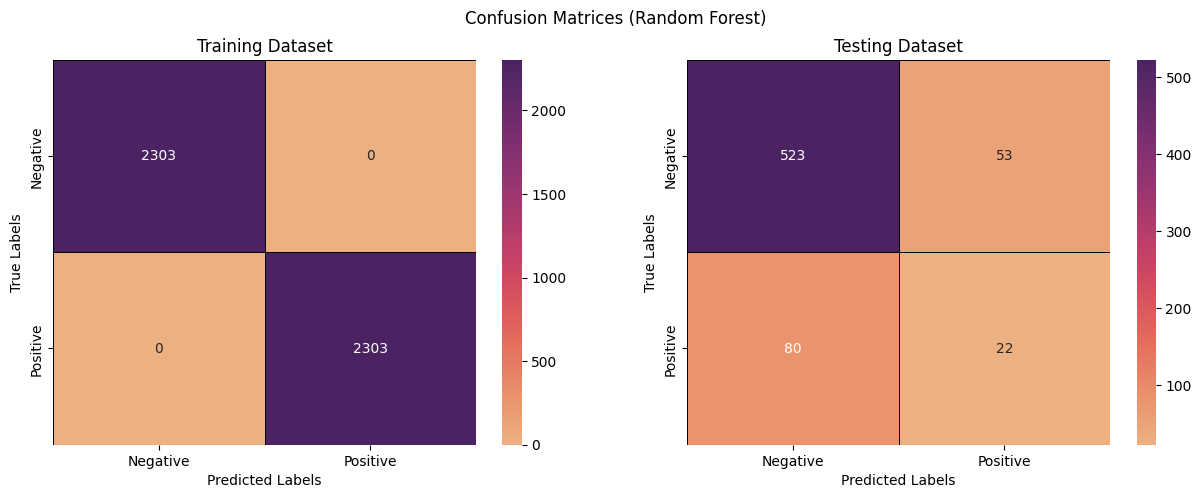

In [95]:
rf_eval_df, rf_cm_train, rf_cm_test = eval(rf, X_train, X_test, y_train, y_test, 'Random Forest')

# Generating the confusion matrices
conmat(rf_cm_train, rf_cm_test, 'Random Forest')

In [96]:
# The evaluation metric score chart
rf_eval_df

,Random Forest
Train Accuracy,1.000000
Test Accuracy,0.803835
Train Precision,1.000000
Test Precision,0.293333
Train Recall,1.000000
Test Recall,0.215686
Train F1-Score,1.000000
Test F1-Score,0.248588
Train ROC-AUC,1.000000
Test ROC-AUC,0.561836


#### 2. Cross- Validation & Hyperparameter Tuning

In [97]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

sk = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

rf_param_grid = {'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [4, 8, 10], 'min_samples_split': [2, 4, 8]}

rf_gscv = GridSearchCV(rf, param_grid = rf_param_grid, cv = sk, scoring = 'recall')

# Fit the Algorithm
rf_gscv.fit(X_test, y_test)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 10],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [98]:
# Finding the best parameter values
rf_gscv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 50}

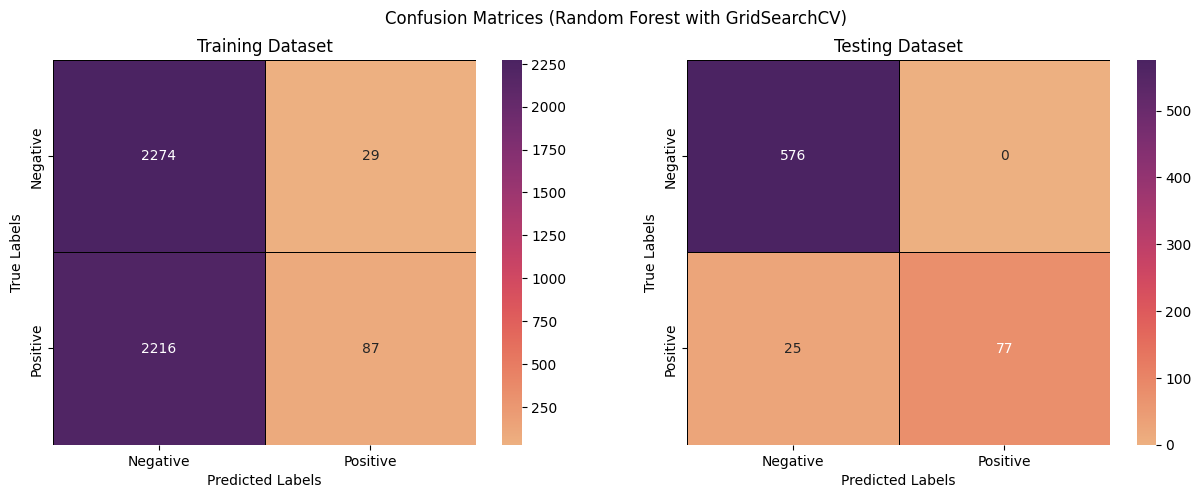

In [99]:
rf_gscv_eval_df, rf_gscv_cm_train, rf_gscv_cm_test = eval(rf_gscv, X_train, X_test, y_train, y_test, 'Random Forest with GridSearchCV')

# Generating the confusion matrices
conmat(rf_gscv_cm_train, rf_gscv_cm_test, 'Random Forest with GridSearchCV')

In [100]:
# The evaluation metric score chart
rf_gscv_eval_df

,Random Forest with GridSearchCV
Train Accuracy,0.512592
Test Accuracy,0.963127
Train Precision,0.750000
Test Precision,1.000000
Train Recall,0.037777
Test Recall,0.754902
Train F1-Score,0.071931
Test F1-Score,0.860335
Train ROC-AUC,0.512592
Test ROC-AUC,0.877451


##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV with Stratified K-Fold crossfold validator was used. The stratification ensures that each fold contains a representative distribution of the target. As we are dealing with a classfication problem, it is important to maintain the same target class distribution in each fold to prevent bias.

In [101]:
# Merging the dataframes containing the evaluation metrics for comparision
pd.concat([rf_eval_df, rf_gscv_eval_df], axis = 1)

,Random Forest,Random Forest with GridSearchCV
Train Accuracy,1.000000,0.512592
Test Accuracy,0.803835,0.963127
Train Precision,1.000000,0.750000
Test Precision,0.293333,1.000000
Train Recall,1.000000,0.037777
Test Recall,0.215686,0.754902
Train F1-Score,1.000000,0.071931
Test F1-Score,0.248588,0.860335
Train ROC-AUC,1.000000,0.512592
Test ROC-AUC,0.561836,0.877451


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The hyperparameter-tuned model has significantly improved all of its evaluation metrics on the testing dataset and the issue of overfiiting on the training dataset has been significantly reduced too. So, it can be said that the hyperparameter tuning has improved the model's performance.


### ML Model - 5: Support Vector Machine

In [102]:
# ML Model - 5 Implementation
from sklearn.svm import SVC

svc = SVC(probability = True, random_state = 0)

# Fit the Algorithm
svc.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [103]:
# Checking the parameters
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

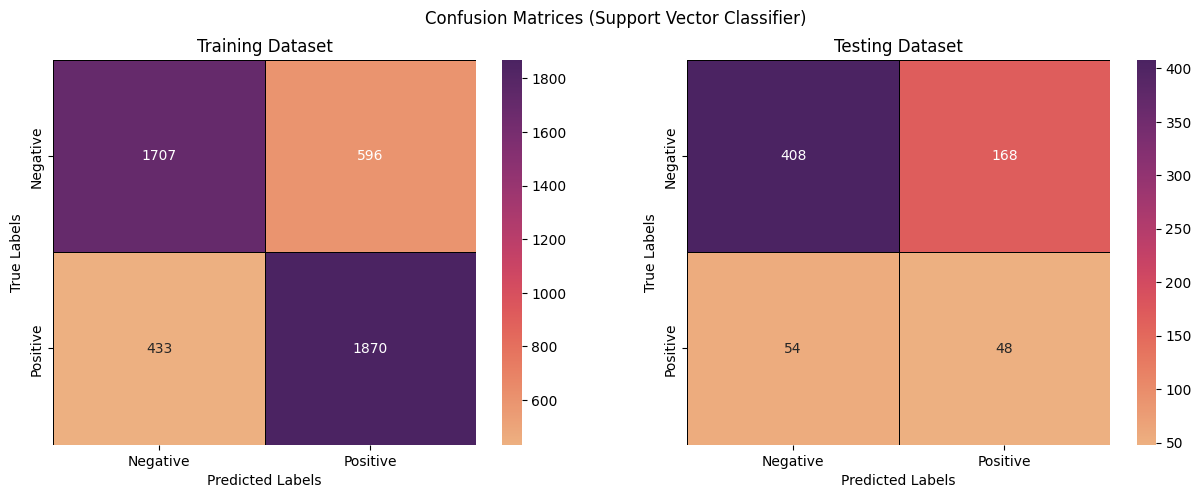

In [104]:
svc_eval_df, svc_cm_train, svc_cm_test = eval(svc, X_train, X_test, y_train, y_test, 'Support Vector Classifier')

# Generating the confusion matrices
conmat(svc_cm_train, svc_cm_test, 'Support Vector Classifier')

In [105]:
# Summary of all the necessary evaluation metrics
svc_eval_df

,Support Vector Classifier
Train Accuracy,0.776596
Test Accuracy,0.672566
Train Precision,0.758313
Test Precision,0.222222
Train Recall,0.811984
Test Recall,0.470588
Train F1-Score,0.784231
Test F1-Score,0.301887
Train ROC-AUC,0.776596
Test ROC-AUC,0.589461


#### 2. Cross- Validation & Hyperparameter Tuning

In [106]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

sk = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

svc_param_grid = {'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.001, 0.0001]}

svc_gscv = GridSearchCV(svc, param_grid = svc_param_grid, cv = sk, scoring = 'recall')

# Fit the Algorithm
svc_gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.001, 0.0001]},
             scoring='recall')

In [107]:
# Finding the best parameter values
svc_gscv.best_params_

{'C': 0.01, 'gamma': 0.01}

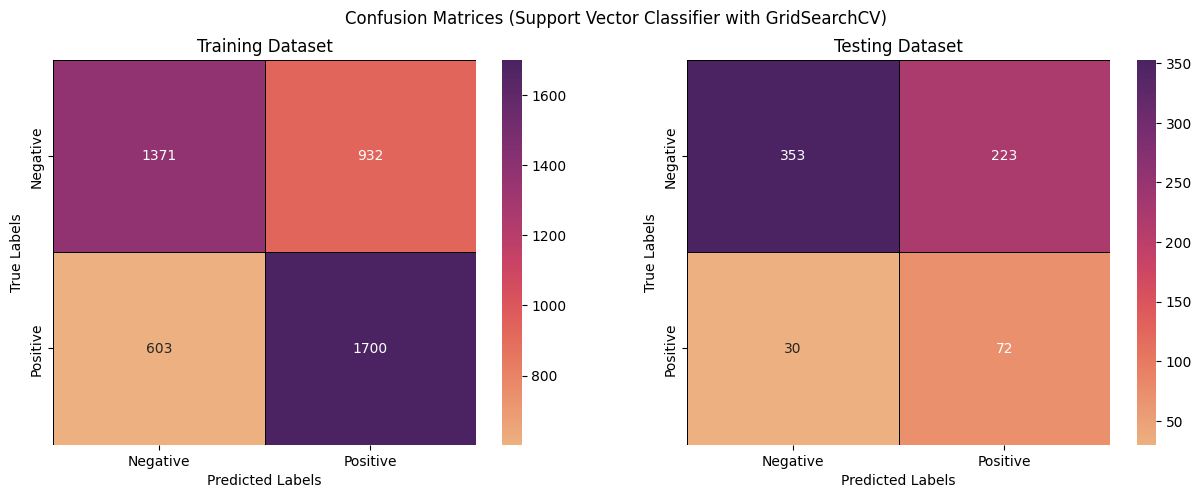

In [108]:
svc_gscv_eval_df, svc_gscv_cm_train, svc_gscv_cm_test = eval(svc_gscv, X_train, X_test, y_train, y_test, 'Support Vector Classifier with GridSearchCV')

# Generating the confusion matrices
conmat(svc_gscv_cm_train, svc_gscv_cm_test, 'Support Vector Classifier with GridSearchCV')

In [109]:
# The evaluation metric score chart
svc_gscv_eval_df

,Support Vector Classifier with GridSearchCV
Train Accuracy,0.666739
Test Accuracy,0.626844
Train Precision,0.645897
Test Precision,0.244068
Train Recall,0.738168
Test Recall,0.705882
Train F1-Score,0.688956
Test F1-Score,0.362720
Train ROC-AUC,0.666739
Test ROC-AUC,0.659365


##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV with Stratified K-Fold crossfold validator was used. The stratification ensures that each fold contains a representative distribution of the target. As we are dealing with a classfication problem, it is important to maintain the same target class distribution in each fold to prevent bias.

> Indented block



In [110]:
# Merging the dataframes containing the evaluation metrics for comparision
pd.concat([svc_eval_df, svc_gscv_eval_df], axis = 1)

,Support Vector Classifier,Support Vector Classifier with GridSearchCV
Train Accuracy,0.776596,0.666739
Test Accuracy,0.672566,0.626844
Train Precision,0.758313,0.645897
Test Precision,0.222222,0.244068
Train Recall,0.811984,0.738168
Test Recall,0.470588,0.705882
Train F1-Score,0.784231,0.688956
Test F1-Score,0.301887,0.362720
Train ROC-AUC,0.776596,0.666739
Test ROC-AUC,0.589461,0.659365


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The issue of overfitting on the training dataset is reduced after the hyperparameter tuning. The hyperparameter-tuned model has improved Recall, F-1 and ROC-AUC scores on the testing dataset. So, it seems that the hyperparameter tuning has improved the model's performance.

### ML Model - 6: AdaBoost

In [111]:
# ML Model - 6 Implementation
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state = 0)

# Fit the Algorithm
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [112]:
# Checking the parameters
abc.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 0}

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

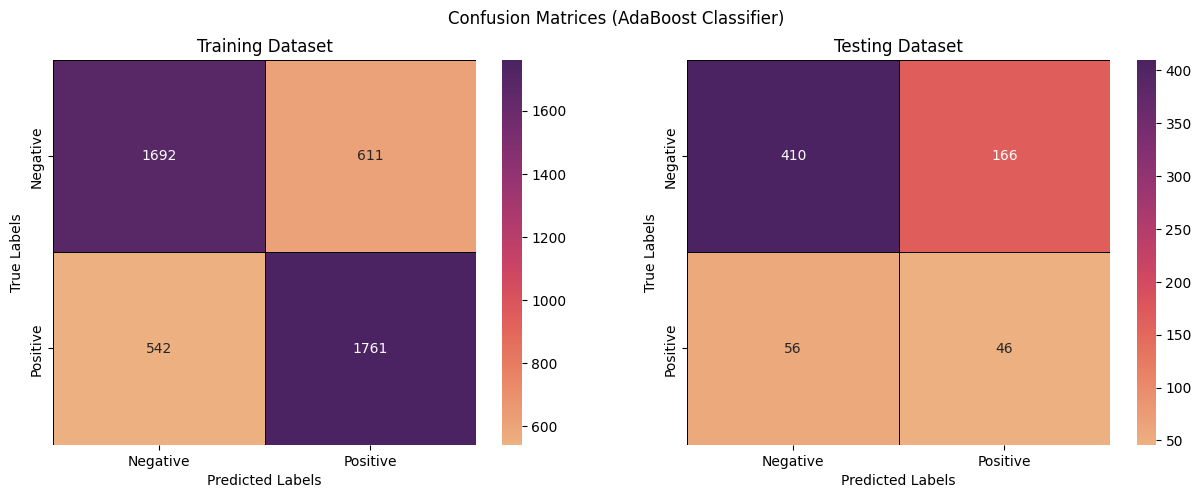

In [113]:
abc_eval_df, abc_cm_train, abc_cm_test = eval(abc, X_train, X_test, y_train, y_test, 'AdaBoost Classifier')

# Generating the confusion matrices
conmat(abc_cm_train, abc_cm_test, 'AdaBoost Classifier')

In [114]:
# Summary of all the necessary evaluation metrics
abc_eval_df

,AdaBoost Classifier
Train Accuracy,0.749674
Test Accuracy,0.672566
Train Precision,0.742411
Test Precision,0.216981
Train Recall,0.764655
Test Recall,0.450980
Train F1-Score,0.753369
Test F1-Score,0.292994
Train ROC-AUC,0.749674
Test ROC-AUC,0.581393


#### 2. Cross- Validation & Hyperparameter Tuning

In [115]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

sk = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

abc_param_grid = {'learning_rate': [0.01, 0.1, 1], 'n_estimators': [50, 100]}

abc_gscv = GridSearchCV(abc, param_grid = abc_param_grid, cv = sk, scoring = 'recall')

# Fit the Algorithm
abc_gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100]},
             scoring='recall')

In [116]:
# Finding the best parameter values
abc_gscv.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

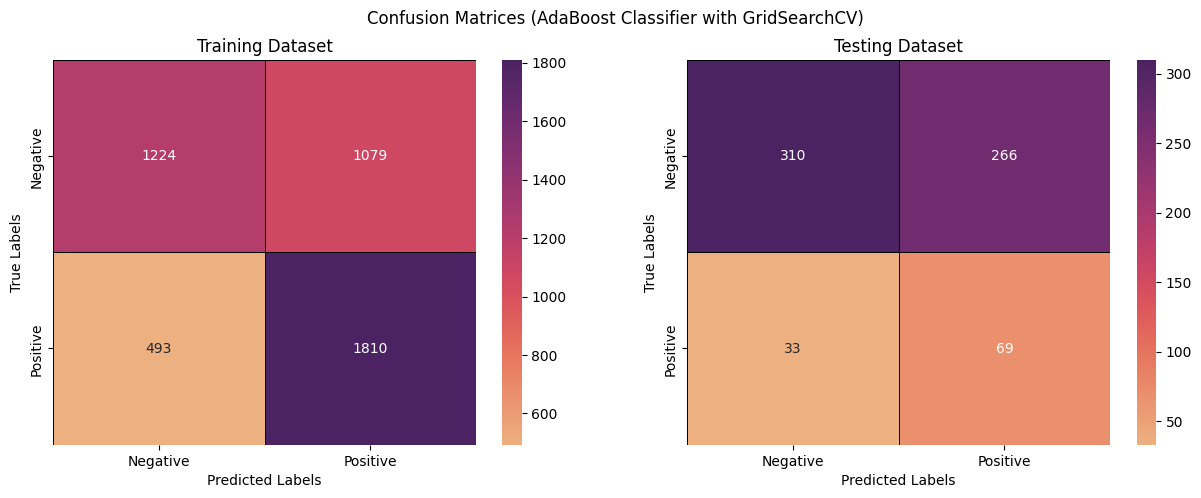

In [117]:
abc_gscv_eval_df, abc_gscv_cm_train, abc_gscv_cm_test= eval(abc_gscv, X_train, X_test, y_train, y_test, 'AdaBoost Classifier with GridSearchCV')

# Generating the confusion matrices
conmat(abc_gscv_cm_train, abc_gscv_cm_test, 'AdaBoost Classifier with GridSearchCV')

In [118]:
# The evaluation metric score chart
abc_gscv_eval_df

,AdaBoost Classifier with GridSearchCV
Train Accuracy,0.658706
Test Accuracy,0.558997
Train Precision,0.626514
Test Precision,0.205970
Train Recall,0.785931
Test Recall,0.676471
Train F1-Score,0.697227
Test F1-Score,0.315789
Train ROC-AUC,0.658706
Test ROC-AUC,0.607333


##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV with Stratified K-Fold crossfold validator was used. The stratification ensures that each fold contains a representative distribution of the target. As we are dealing with a classfication problem, it is important to maintain the same target class distribution in each fold to prevent bias.

In [119]:
# Merging the dataframes containing the evaluation metrics for comparision
pd.concat([abc_eval_df, abc_gscv_eval_df], axis = 1)

,AdaBoost Classifier,AdaBoost Classifier with GridSearchCV
Train Accuracy,0.749674,0.658706
Test Accuracy,0.672566,0.558997
Train Precision,0.742411,0.626514
Test Precision,0.216981,0.205970
Train Recall,0.764655,0.785931
Test Recall,0.450980,0.676471
Train F1-Score,0.753369,0.697227
Test F1-Score,0.292994,0.315789
Train ROC-AUC,0.749674,0.658706
Test ROC-AUC,0.581393,0.607333


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The issue of overfitting on the training dataset is reduced after the hyperparameter tuning. The hyperparameter-tuned model has improved Recall, F-1 and ROC-AUC scores on the testing dataset. So, it seems that the hyperparameter tuning has improved the model's performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* The `Recall` score was chosen as the main evaluation metric to decide upon which model is best suited for this classification problem, as the cases of false negatives should be strictly avoided here. It can prove to be fatal if a patient who actually has a risk of CHD is classified as not having a CHD risk, as the patient may not undergo the required treatment. In this scenario, it is acceptable to have cases of false positives.
* The `ROC-AUC` score is also considered as an important evaluation metric here, as it measures the ability of the model to separate the positive and negative classes. In case the Recall score of multiple models are equal or pretty close, then the ROC-AUC score will have a say in the final decision to decide upon the best model.

As observed during the model fitting part, almost all the models have performed better under hyperparameter-tuning, so only hyperparameter-tuned models are being considered here:

In [120]:
# Creating a dataframe having the evaluation metrics Recall and ROC-AUC of all the models (with hyperparaemter-tuning)
pd.concat([lr_gscv_eval_df, dt_gscv_eval_df, knn_gscv_eval_df, rf_gscv_eval_df, svc_gscv_eval_df, abc_gscv_eval_df], axis = 1).loc[['Test Recall', 'Test ROC-AUC']].T

,Test Recall,Test ROC-AUC
Logistic Regression with GridSearchCV,0.637255,0.671058
Decision Tree with GridSearchCV,0.666667,0.821181
K-Nearest Neighbors with GridSearchCV,0.392157,0.556321
Random Forest with GridSearchCV,0.754902,0.877451
Support Vector Classifier with GridSearchCV,0.705882,0.659365
AdaBoost Classifier with GridSearchCV,0.676471,0.607333


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

* Going through the summary of the Recall and ROC-AUC scores, it can be observed that the `Random Forest` model has a Recall score of 0.75 approximately and the `AdaBoost` model has a a Recall score of 0.78 approximately. The Recall scores of the Random Forest model and the AdaBoost model are the highest among all the models and are quite close to each other.
* But the ROC-AUC score of the Random Forest is 0.88 appoximately, which is higher than the ROC-AUC score of the AdaBoost that is 0.62. So, the Random Forest model does a better job at separating the classes.
* Hence, based on the above two points, `the hyperparameter-tuned Random Forest model is chosen as the final prediction model`.

In [121]:
# Choosing the hyperparameter-tuned Random Forest as the final model
final_model = rf_gscv.best_estimator_

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [122]:
# Installing SHAP library
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 9.9 MB/s eta 0:00:00


In [123]:
# Importing SHAP library
import shap

# Creating an instance of the Tree Explainer from the SHAP library and computing the SHAP values
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)


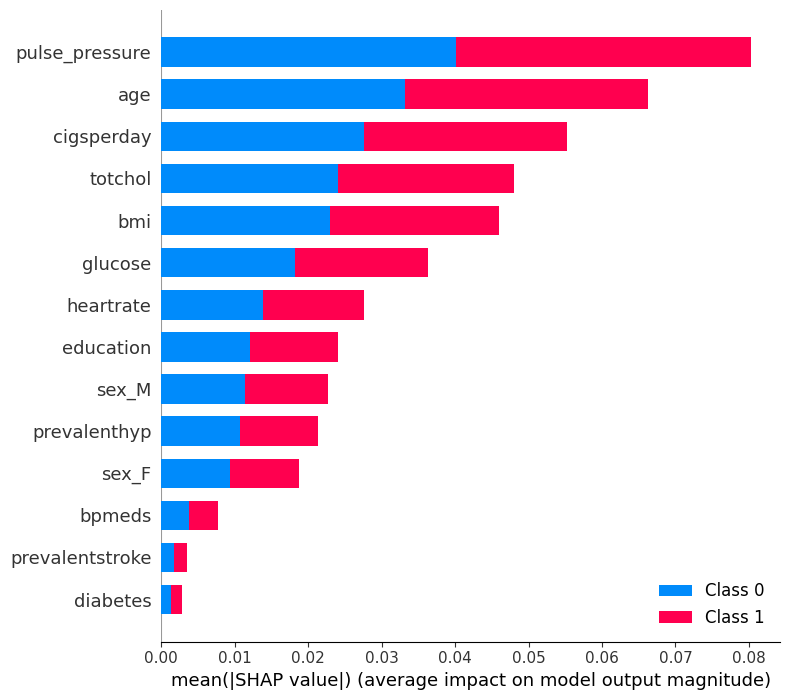

In [124]:
# Creating a summary plot
shap.summary_plot(shap_values, X_test)

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [125]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [126]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***